In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import ascii
import numpy as np
from astropy.io import fits
from scipy.stats import pearsonr
import seaborn as sns
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10
lims = [[0.1,0.5],[0.6,1.0],np.log([0.25,4.0]),np.log([0.25,4.0]),np.log([0.5,2.0]),np.log([0.5,2.0])]
simpars = ['\Omega_m','\sigma_8','\log(A_{\mathrm{SN1}})','\log(A_{\mathrm{AGN1}})','\log(A_{\mathrm{SN2}})','\log(A_{\mathrm{AGN1}})']

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)

# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rc('font', family='Times New Roman')

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
import seaborn as sns
sns.set_palette("muted")

In [2]:
lims = [[0.1,0.5],[0.6,1.0],np.log([0.25,4.0]),np.log([0.25,4.0]),np.log([0.5,2.0]),np.log([0.5,2.0])]
simpars = ['\Omega_m','\sigma_8','log(A_{SN1})','log(A_{AGN1})','log(A_{SN2})','log(A_{AGN2})']
label_table = np.loadtxt("CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt", skiprows=1, usecols=range(1, 7))
corr_labels = np.vstack((label_table,label_table,label_table))
for i in range(corr_labels.shape[1]):
    if i>1:
        corr_labels[:,i] = np.log(corr_labels[:,i])
        
axes = ['x', 'y', 'z']

d = np.load("../wdplus_data.npz")# dictionary
r = d['r']
dat = {axis: d[axis] for axis in axes}
wdp = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)
d = np.load("../wdcross_data.npz")
dat = {axis: d[axis] for axis in axes}
wdx = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)
d = np.load("../wdd_data.npz")
wdd = np.array(d['wgg'])


In [3]:
data = np.loadtxt("../sim_galaxyProperties.txt", skiprows=1)  # Skip the header row
print(data[18,12])
data = np.vstack((data, data, data))
mean_SFR, mean_SFR_spi, mean_SFR_ell, mean_SSFR, \
mean_SSFR_spi, mean_SSFR_ell, mean_e, mean_e_spi, \
mean_e_ell, std_e, std_e_spi, std_e_ell, split_fracs = data.T
# mean_SFR, mean_SSFR, mean_e, std_e, split_frac = data.T
print(data[1018,12])

0.152381
0.152381


### Coloring in scatterplot by mean SFR

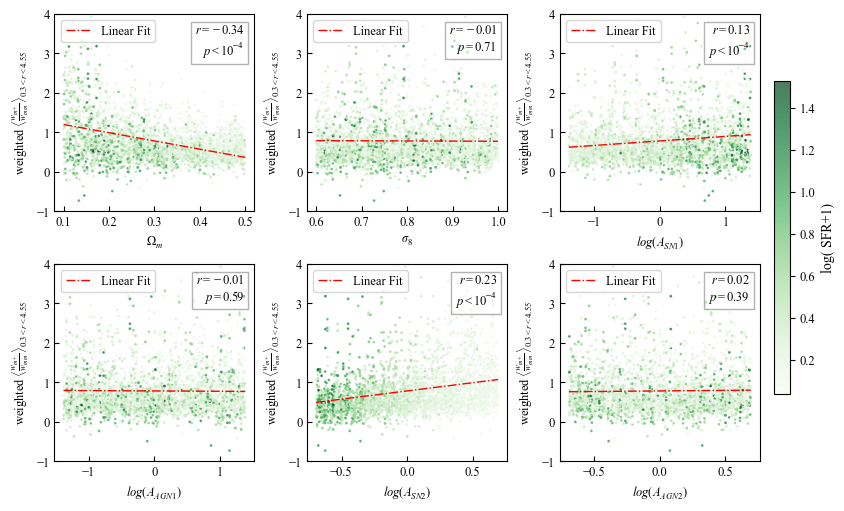

In [59]:
corr_data = wdp[:,:4]/wdd[:,:4]
weights = 1/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights


log_mean_SFR =  np.log( mean_SFR +1)

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
#     ax.axhline(np.mean(wtd_corr_data), c='0.5', linewidth=0.2, linestyle='-',label='')
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
#     ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -1, 2),cmap='Blues')
    scatter = ax.scatter(corr_labels[:, param], avg_corr, s=1, c=log_mean_SFR, cmap=mpl.cm.Greens,alpha=0.7,label="")
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"weighted $\langle \frac{w_{m+}}{w_{mm}} \rangle_{0.3<r<4.55}$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([-1, 4])
    
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', shrink=0.7, pad=0.02)
cbar.set_label('log( SFR+1)', fontsize=10)
fig.set_constrained_layout(True)
plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/ParamDependenceSFR.pdf', dpi=300)

plt.show()

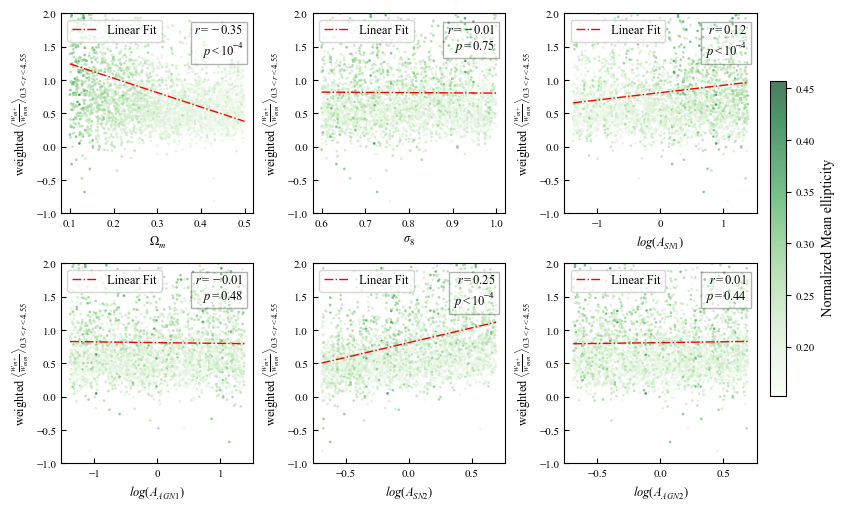

In [57]:
corr_data = wdp[:,:4]/wdd[:,:4]
weights = 1/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights



fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
#     ax.axhline(np.mean(wtd_corr_data), c='0.5', linewidth=0.2, linestyle='-',label='')
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
#     ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -1, 2),cmap='Blues')
    scatter = ax.scatter(corr_labels[:, param], avg_corr, s=1, c=mean_e, cmap=mpl.cm.Greens,alpha=0.7,label="")
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"weighted $\langle \frac{w_{m+}}{w_{mm}} \rangle_{0.3<r<4.55}$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([-1, 2])
    
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', shrink=0.7, pad=0.02)
cbar.set_label(' Normalized Mean ellipticity', fontsize=10)
fig.set_constrained_layout(True)
plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/ParamDependenceEpsilon.pdf', dpi=300)

plt.show()

(3000,)


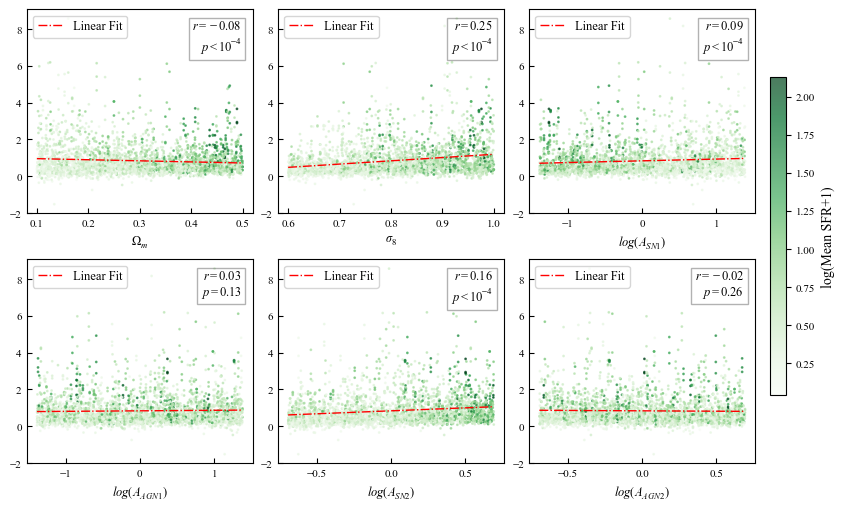

In [48]:
corr_datas = []
corr_data = wdp[:,:4]#/wdd[:,:]
weights = 1/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights
corr_datas.append(wtd_corr_data)

print(mean_SFR.shape)
log_mean_SFR =  np.log( mean_SFR +1)

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
#     ax.axhline(np.mean(wtd_corr_data), c='0.5', linewidth=0.2, linestyle='-',label='')
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
#     ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -1, 2),cmap='Blues')
    scatter = ax.scatter(corr_labels[:, param], avg_corr, s=1, c=np.log(split_fracs+1), cmap=mpl.cm.Greens,alpha=0.7,label="")
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
#     ax.set_ylabel(r"weighted $\langle \frac{w_{m+}}{w_{mm}} \rangle_{0.3<r<4.55}$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
#     ax.set_ylim([-1, 2.5])
    
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', shrink=0.7, pad=0.02)
cbar.set_label('log(Mean SFR+1)', fontsize=10)
fig.set_constrained_layout(True)
plt.show()

### Ellipticity normalised correlations

In [10]:
wgplusses = []
wgcrosses = []
ggs = []

In [11]:
wgplusses_x = []
wgcrosses_x = []
ggs_x = []
for i in range(0,1000):
    for j, f in enumerate((f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_LH_x/wgp_LH{i}.dat',f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_LH_x/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wgplusses_x.append(wgp)
    wgcrosses_x.append(wgx)
    ggs_x.append(wgg)
    wgplusses.append(wgp)
    wgcrosses.append(wgx)
    ggs.append(wgg)

In [12]:
wgplusses_y = []
wgcrosses_y = []
ggs_y = []
for i in range(0,1000):
    for j, f in enumerate((f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_LH_y/wgp_LH{i}.dat',f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_LH_y/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wgplusses_y.append(wgp)
    wgcrosses_y.append(wgx)
    ggs_y.append(wgg)
    wgplusses.append(wgp)
    wgcrosses.append(wgx)
    ggs.append(wgg)

In [13]:
wgplusses_z = []
wgcrosses_z = []
ggs_z = []
for i in range(0,1000):
    for j, f in enumerate((f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_LH_z/wgp_LH{i}.dat',f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_LH_z/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wgplusses_z.append(wgp)
    wgcrosses_z.append(wgx)
    ggs_z.append(wgg)
    wgplusses.append(wgp)
    wgcrosses.append(wgx)
    ggs.append(wgg)

In [14]:
wdp_noMAG = np.array(wgplusses)
wdx_noMAG = np.array(wgcrosses)
wgplusses_x = np.array(wgplusses_x);
wgplusses_y = np.array(wgplusses_y); 
wgplusses_z = np.array(wgplusses_z)
wgcrosses_x = np.array(wgcrosses_x); 
wgcrosses_y = np.array(wgcrosses_y);
wgcrosses_z = np.array(wgcrosses_z)
ggs = np.array(ggs)
print(np.sum(np.isnan(wgplusses)), np.sum(np.isnan(wgcrosses)), np.sum(np.isnan(ggs)),ggs.shape)

0 0 0 (3000, 7)


[1.54162554 0.60915532 0.18409344 0.08231021 0.04369697 0.02130474
 0.00826074]


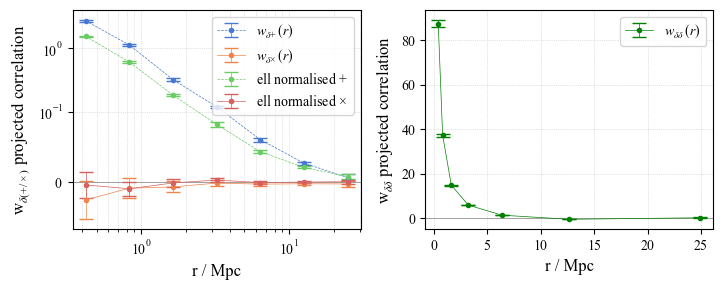

In [9]:
sqrtNz = np.sqrt(wgplusses_z.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(22/3,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wdp,axis=0), yerr=np.std(wdp,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wdx,axis=0), yerr=np.std(wdx,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wgplusses_z,axis=0), yerr=np.std(wgplusses_z,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'ell normalised $+$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wgcrosses_z,axis=0), yerr=np.std(wgcrosses_z,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'ell normalised $\times$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(ggs,axis=0), yerr=np.std(ggs,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5, c='green',label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
# ax[0].set_ylim(-0.1*np.abs(ax[0].get_ylim()).max(), np.abs(ax[0].get_ylim()).max())
# ax[1].set_ylim(-0.1*np.abs(ax[1].get_ylim()).max(), np.abs(ax[1].get_ylim()).max())
ax[0].set_yscale('symlog', linthresh=1e-1)
ax[0].set_xscale('log')
ax[0].set_xlabel("r / Mpc")
ax[0].set_ylabel(r"w$_{\delta (+/\times)}$ projected correlation")
ax[0].legend() ; ax[1].legend()
ax[1].set_xlabel("r / Mpc")
ax[1].set_ylabel(r"w$_{\delta\delta}$ projected correlation")
fig.tight_layout()
print(np.mean(wgplusses_z,axis=0))

In [10]:
d = np.load("../wdplus_data.npz")
# dictionary
axes = ['x', 'y', 'z']
r = d['r']
dat = {axis: d[axis] for axis in axes}
wdplusses_mag = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)
d = np.load("../wdcross_data.npz")
dat = {axis: d[axis] for axis in axes}
wdcrosses_mag = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)

d = np.load("../wdd_data.npz")
wdd = np.array(d['wgg'])

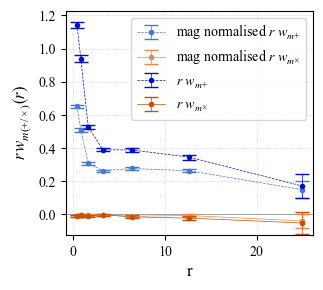

In [11]:
sqrtN = np.sqrt(wdp_noMAG.shape[0])
r_wdplusses = wdp_noMAG*r
r_wdcrosses = wdx_noMAG*r

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10/3,3))
ax.axhline(0,c='0.5',linewidth=0.5)
ax.errorbar(r,np.mean(r_wdplusses,axis=0), yerr=np.std(r_wdplusses,axis=0)/sqrtN, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'mag normalised $r$ $w_{m{+}}$', marker='o',markersize=3)
ax.errorbar(r,np.mean(r_wdcrosses,axis=0), yerr=np.std(r_wdcrosses,axis=0)/sqrtN, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'mag normalised $r$ $w_{m {\times}}$', marker='o',markersize=3)
r_wdplusses_mag = wdplusses_mag*r
r_wdcrosses_mag = wdcrosses_mag*r
ax.errorbar(r,np.mean(r_wdplusses_mag,axis=0), yerr=np.std(r_wdplusses_mag,axis=0)/sqrtN, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$r$ $w_{m{+}}$', marker='o',markersize=3, color='xkcd:true blue')
ax.errorbar(r,np.mean(r_wdcrosses_mag,axis=0), yerr=np.std(r_wdcrosses_mag,axis=0)/sqrtN, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$r$ $w_{m {\times}}$', marker='o',markersize=3,color='xkcd:dark orange')

ax.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax.set_ylim(-0.1*np.abs(ax.get_ylim()).max(), np.abs(ax.get_ylim()).max())
# ax[0].set_title(r"LH (0 - 1000) average position-shape")
ax.set_xlabel("r")
ax.set_ylabel(r"$r \, w_{m(+/\times)}(r)$")
ax.legend() 
fig.tight_layout()
plt.savefig(
    '/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/avg_correlationsMAGNORM.pdf',
    dpi=300, bbox_inches='tight'
)

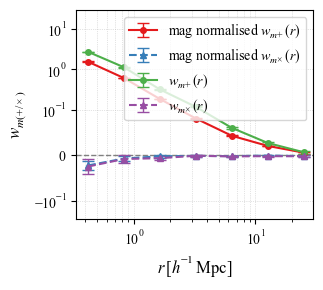

In [12]:
sns.set_palette("Set1")
sqrtN = np.sqrt(wdp_noMAG.shape[0])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10/3, 3))  # Width-to-height ratio adjusted for a clean layout
ax.axhline(0, c='0.5', linewidth=1, linestyle='--')
ax.errorbar(
    r, np.mean(wdp_noMAG, axis=0), yerr=np.std(wdp_noMAG, axis=0) / sqrtN,
    linewidth=1.5, linestyle='-', elinewidth=1, capsize=4,
    label=r'mag normalised $w_{m{+}}\,(r)$', marker='o', markersize=4
)
ax.errorbar(
    r, np.mean(wdx_noMAG, axis=0), yerr=np.std(wdx_noMAG, axis=0) / sqrtN,
    linewidth=1.5, linestyle='--', elinewidth=1, capsize=4,
    label=r'mag normalised $w_{m{\times}}\,(r)$', marker='^', markersize=4
)


ax.errorbar(
    r, np.mean(wdp, axis=0), yerr=np.std(wdp, axis=0) / sqrtN,
    linewidth=1.5, linestyle='-', elinewidth=1, capsize=4,
    label=r'$w_{m{+}}\,(r)$', marker='o', markersize=4
)
ax.errorbar(
    r, np.mean(wdx, axis=0), yerr=np.std(wdx, axis=0) / sqrtN,
    linewidth=1.5, linestyle='--', elinewidth=1, capsize=4,
    label=r'$w_{m{\times}}\,(r)$', marker='^', markersize=4
)

# Grid and scaling

ax.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax.set_xscale('log')  # Example for log scale x-axis
ax.set_yscale('symlog', linthresh=1e-1)  # Example for log scale y-axis
ax.set_xlim(np.min(r) * 0.8, np.max(r) * 1.2)

# Adjust y-limits to be symmetric
ax.set_ylim(
    -0.1 * np.abs(ax.get_ylim()).max(), 10*np.abs(ax.get_ylim()).max()
)




# Axis labels and titles
ax.set_xlabel(r"$r \, [h^{-1} \, \mathrm{Mpc}]$")
ax.set_ylabel(r"$w_{m(+/\times)}$")
ax.legend()



# Adjust layout and save
fig.tight_layout()

plt.show()

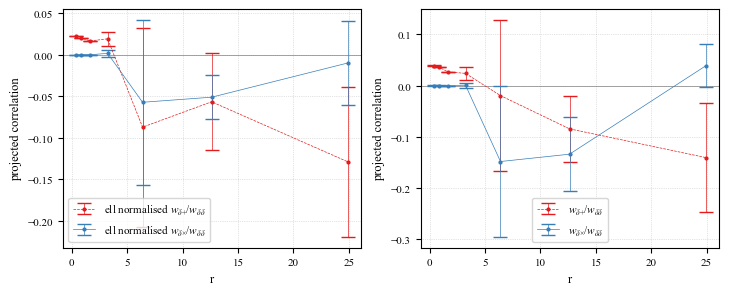

In [11]:
d_wdp_noMAG = wdp_noMAG[:]/wdd
d_wdx_noMAG = wdx_noMAG[:]/wdd
d_wdp = wdp/wdd
d_wdx = wdx/wdd

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(22/3,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(d_wdp_noMAG,axis=0), yerr=np.std(d_wdp_noMAG,axis=0)/sqrtN, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'ell normalised $w_{\delta{+}}/w_{\delta\delta}$', marker='o',markersize=2)
ax[0].errorbar(r,np.mean(d_wdx_noMAG,axis=0), yerr=np.std(d_wdx_noMAG,axis=0)/sqrtN, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'ell normalised $w_{\delta {\times}}/w_{\delta\delta}$', marker='o',markersize=2)
ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[1].errorbar(r,np.mean(d_wdp,axis=0), yerr=np.std(d_wdp,axis=0)/sqrtN, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}/w_{\delta\delta}$', marker='o',markersize=2)
ax[1].errorbar(r,np.mean(d_wdx,axis=0), yerr=np.std(d_wdx,axis=0)/sqrtN, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}/w_{\delta\delta}$', marker='o',markersize=2)
ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax[0].set_xlabel("r")
ax[0].set_ylabel(r"projected correlation")
ax[0].legend() 
ax[1].set_xlabel("r")
ax[1].set_ylabel(r"projected correlation")
ax[1].legend() 
fig.tight_layout()

### Splitting SSFR and normalised ellipticities

In [4]:
wgplusses_ell = []
wgcrosses_ell = []
ggs_ell = []

In [5]:
for i in range(0,1000):
    for j, f in enumerate((f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_ELL_LH_x/wgp_LH{i}.dat',f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_ELL_LH_x/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wgplusses_ell.append(wgp)
    wgcrosses_ell.append(wgx)
    ggs_ell.append(wgg)

for i in range(0,1000):
    for j, f in enumerate((f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_ELL_LH_y/wgp_LH{i}.dat',f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_ELL_LH_y/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wgplusses_ell.append(wgp)
    wgcrosses_ell.append(wgx)
    ggs_ell.append(wgg)
    
for i in range(0,1000):
    for j, f in enumerate((f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_ELL_LH_z/wgp_LH{i}.dat',f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_ELL_LH_z/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wgplusses_ell.append(wgp)
    wgcrosses_ell.append(wgx)
    ggs_ell.append(wgg)
    
wdp_noMAG_ell = np.array(wgplusses_ell)
wdx_noMAG_ell = np.array(wgcrosses_ell)
wdg_ell = np.array(ggs_ell)
print(np.sum(np.isnan(wdp_noMAG_ell)), np.sum(np.isnan(wdx_noMAG_ell)),wdx_noMAG_ell.shape)

0 0 (3000, 7)


[4.23393648 1.59275995 0.43550693 0.17031729 0.08384433 0.03723402
 0.00993309]


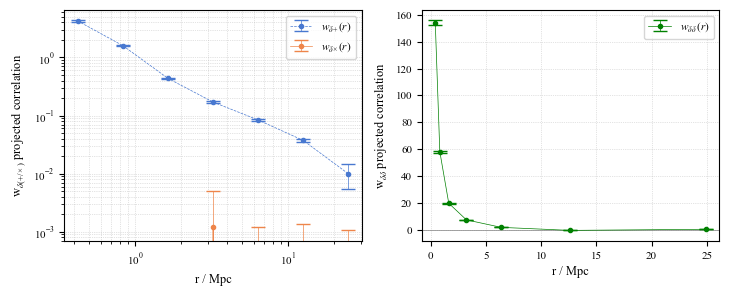

In [11]:
sqrtNz = np.sqrt(wdp_noMAG_ell.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(22/3,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wdp_noMAG_ell,axis=0), yerr=np.std(wdp_noMAG_ell,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wdx_noMAG_ell,axis=0), yerr=np.std(wdx_noMAG_ell,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}\,(r)$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(ggs_ell,axis=0), yerr=np.std(ggs_ell,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5, c='green',label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
# ax[0].set_ylim(-0.1*np.abs(ax[0].get_ylim()).max(), np.abs(ax[0].get_ylim()).max())
# ax[1].set_ylim(-0.1*np.abs(ax[1].get_ylim()).max(), np.abs(ax[1].get_ylim()).max())
# ax[0].set_title(r"LH (0 - 1000) average position-shape")
ax[0].set_xlabel("r / Mpc")
ax[0].set_ylabel(r"w$_{\delta (+/\times)}$ projected correlation")
ax[0].legend() ; ax[1].legend()
# ax[1].set_title("LH (0 - 1000) average auto correlation")
ax[1].set_xlabel("r / Mpc")
ax[1].set_ylabel(r"w$_{\delta\delta}$ projected correlation")
ax[0].set_xscale('log'); ax[0].set_yscale('log'); 
fig.tight_layout()
print(np.mean(wdp_noMAG_ell,axis=0))

In [6]:
wgplusses_spi = []
wgcrosses_spi = []
ggs_spi = []

In [7]:
for i in range(0,1000):
    for j, f in enumerate((f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_SPI_LH_x/wgp_LH{i}.dat',f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_SPI_LH_x/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            1+1
            r, wgg = dat['rnom'], dat['wgg']
    
    wgplusses_spi.append(wgp)
    wgcrosses_spi.append(wgx)
    ggs_spi.append(wgg)

for i in range(0,1000):
    for j, f in enumerate((f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_SPI_LH_y/wgp_LH{i}.dat',f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_SPI_LH_y/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            1+1
            r, wgg = dat['rnom'], dat['wgg']
    
    wgplusses_spi.append(wgp)
    wgcrosses_spi.append(wgx)
    ggs_spi.append(wgg)
    
for i in range(0,1000):
    for j, f in enumerate((f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_SPI_LH_z/wgp_LH{i}.dat',f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOMAG_SPI_LH_z/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            1+1
            r, wgg = dat['rnom'], dat['wgg']
    
    wgplusses_spi.append(wgp)
    wgcrosses_spi.append(wgx)
    ggs_spi.append(wgg)
    
wdp_noMAG_spi = np.array(wgplusses_spi)
wdx_noMAG_spi = np.array(wgcrosses_spi)
wdg_spi = np.array(ggs_spi)
print(np.sum(np.isnan(wdp_noMAG_spi)), np.sum(np.isnan(wdx_noMAG_spi)),wdp_noMAG_spi.shape)

0 0 (3000, 7)


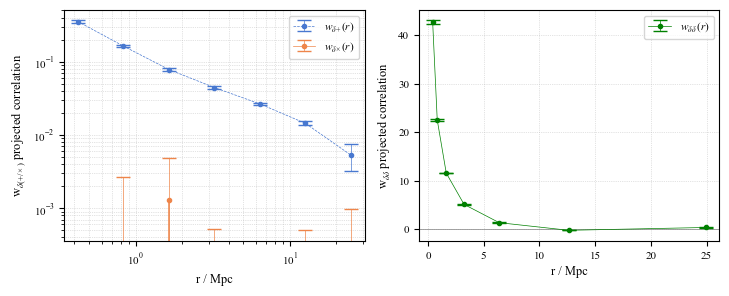

In [141]:
sqrtNz = np.sqrt(wdp_noMAG_spi.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(22/3,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wdp_noMAG_spi,axis=0), yerr=np.std(wdp_noMAG_spi,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wdx_noMAG_spi,axis=0), yerr=np.std(wdx_noMAG_spi,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}\,(r)$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(ggs_spi,axis=0), yerr=np.std(ggs_spi,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5, c='green',label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
# ax[0].set_ylim(-0.1*np.abs(ax[0].get_ylim()).max(), np.abs(ax[0].get_ylim()).max())
# ax[1].set_ylim(-0.1*np.abs(ax[1].get_ylim()).max(), np.abs(ax[1].get_ylim()).max())
# ax[0].set_title(r"LH (0 - 1000) average position-shape")
ax[0].set_xlabel("r / Mpc")
ax[0].set_ylabel(r"w$_{\delta (+/\times)}$ projected correlation")
ax[0].legend() ; ax[1].legend()
# ax[1].set_title("LH (0 - 1000) average auto correlation")
ax[1].set_xlabel("r / Mpc")
ax[1].set_ylabel(r"w$_{\delta\delta}$ projected correlation")
ax[0].set_xscale('log'); ax[0].set_yscale('log'); 
fig.tight_layout()

In [20]:
ggs_noORI = []

In [21]:
for i in range(0,1000):
    f = f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOORI_LH_x/wgg_LH{i}.dat'
    dat = ascii.read(f)
    r, wgg = dat['rnom'], dat['wgg']

    ggs_noORI.append(wgg)

for i in range(0,1000):
    f = f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOORI_LH_y/wgg_LH{i}.dat'
    dat = ascii.read(f)
    r, wgg = dat['rnom'], dat['wgg']

    ggs_noORI.append(wgg)
    
for i in range(0,1000):
    f = f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOORI_LH_z/wgg_LH{i}.dat'
    dat = ascii.read(f)
    r, wgg = dat['rnom'], dat['wgg']

    ggs_noORI.append(wgg)

    
wdg_noORI = np.array(ggs_noORI)

print(np.sum(np.isnan(wdg_noORI)),wdg_noORI.shape)

0 (3000, 7)


In [125]:
ggs_noORI_ell = []

In [126]:
for i in range(0,1000):
    f = f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOORI_ELL_LH_x/wgg_LH{i}.dat'
    dat = ascii.read(f)
    r, wgg = dat['rnom'], dat['wgg']

    ggs_noORI_ell.append(wgg)

for i in range(0,1000):
    f = f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOORI_ELL_LH_y/wgg_LH{i}.dat'
    dat = ascii.read(f)
    r, wgg = dat['rnom'], dat['wgg']

    ggs_noORI_ell.append(wgg)
    
for i in range(0,1000):
    f = f'../correlatingDM-folder/OUTPUT_CAMELS_DM_NOORI_ELL_LH_z/wgg_LH{i}.dat'
    dat = ascii.read(f)
    r, wgg = dat['rnom'], dat['wgg']

    ggs_noORI_ell.append(wgg)

    
wdg_noORI_ell = np.array(ggs_noORI_ell)

print(np.sum(np.isnan(wdg_noORI_ell)),wdg_noORI_ell.shape)

0 (3000, 7)


In [8]:
label_table = np.loadtxt("CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt", skiprows=1, usecols=range(1, 7))
axes = ['x', 'y', 'z']

d = np.load("../wdplus_data.npz")
r = d['r']
dat = {axis: d[axis] for axis in axes}
wdp = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)

d = np.load("../wdcross_data.npz")
dat = {axis: d[axis] for axis in axes}
wdx = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)

# SSFR < 10^-10.5 M_0/yr
d = np.load("../wdplus_ell_data.npz") # dictionary
r = d['r']
dat = {axis: d[axis] for axis in axes}
wdp_ell = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)

d = np.load("../wdcross_ell_data.npz")
dat = {axis: d[axis] for axis in axes}
wdx_ell = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)
# SSFR > 10^-10.5 M_0/yr
d = np.load("../wdplus_spi_data.npz") # dictionary
r = d['r']
dat = {axis: d[axis] for axis in axes}
wdp_spi = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)

d = np.load("../wdcross_spi_data.npz")
dat = {axis: d[axis] for axis in axes}
wdx_spi = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)

d = np.load("../wdd_data.npz")
wdd = np.array(d['wgg'])

d = np.load("../wgd_data.npz")
wgd = np.array(d['wgg'])

corr_labels = np.vstack((label_table,label_table, label_table))
for i in range(corr_labels.shape[1]):
    if i>1:
        corr_labels[:,i] = np.log(corr_labels[:,i])

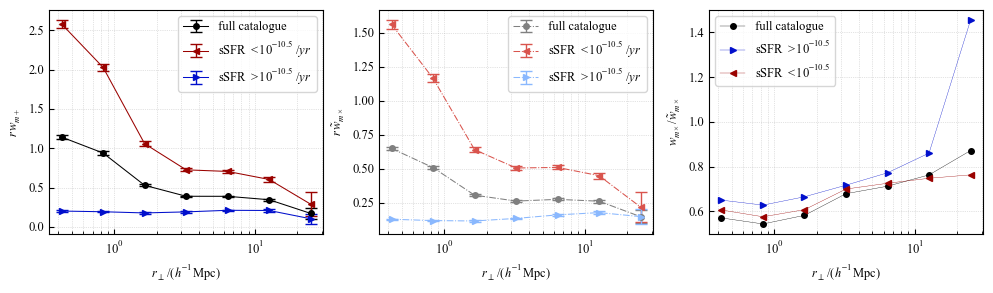

In [15]:
sqrtN = np.sqrt(wdp.shape[0])
r_wdp = wdp*r
r_wdx = wdx

r_wdp_noMAG = wdp_noMAG*r
r_wdx_noMAG = wdx_noMAG

r_wdp_spi = wdp_spi*r
r_wdp_ell = wdp_ell*r
r_wdx_spi = wdx_spi
r_wdx_ell = wdx_ell

r_wdp_noMAG_spi = wdp_noMAG_spi*r
r_wdp_noMAG_ell = wdp_noMAG_ell*r
r_wdx_noMAG_spi = wdx_noMAG_spi
r_wdx_noMAG_ell = wdx_noMAG_ell

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30/3, 3))  # Width-to-height ratio adjusted for a clean layout
ax[0].errorbar(
    r, np.mean(r_wdp, axis=0), yerr=np.std(r_wdp, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='k',
    label=r'full catalogue', marker='o', markersize=4
)
ax[1].errorbar(
    r, np.mean(r_wdp_noMAG, axis=0), yerr=np.std(r_wdp_noMAG, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-.', elinewidth=1, capsize=4, color='0.5',
    label=r'full catalogue', marker='o', markersize=4
)
ax[0].errorbar(
    r, np.mean(r_wdp_ell, axis=0), yerr=np.std(r_wdp_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='xkcd:deep red',
    label=r'sSFR $<10^{-10.5}$ $ /yr$', marker='<', markersize=4
)
ax[1].errorbar(
    r, np.mean(r_wdp_noMAG_ell, axis=0), yerr=np.std(r_wdp_noMAG_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-.', elinewidth=1, capsize=4, color='xkcd:pale red',
    label=r'sSFR $<10^{-10.5}$ $ /yr$', marker='<', markersize=4
)
ax[0].errorbar(
    r, np.mean(r_wdp_spi, axis=0), yerr=np.std(r_wdp_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='xkcd:true blue',
    label=r'sSFR $>10^{-10.5}$ $ /yr$', marker='>', markersize=4
)
ax[1].errorbar(
    r, np.mean(r_wdp_noMAG_spi, axis=0), yerr=np.std(r_wdp_noMAG_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-.', elinewidth=1, capsize=4, color='xkcd:carolina blue',
    label=r'sSFR $>10^{-10.5}$ $ /yr$', marker='>', markersize=4
)

ax[2].plot(
    r,  np.mean(r_wdp_noMAG, axis=0)/ np.mean(r_wdp, axis=0), lw=0.25,
    linestyle='-', color='k', label=r'full catalogue', marker='o', markersize=4
)
ax[2].plot(
    r,  np.mean(r_wdp_noMAG_spi, axis=0)/ np.mean(r_wdp_spi, axis=0) ,lw=0.25,
    linestyle='-', color='xkcd:true blue', label=r'sSFR $>10^{-10.5}$', marker='>', markersize=4
)
ax[2].plot(
    r, np.mean(r_wdp_noMAG_ell/ np.mean(r_wdp_ell, axis=0) , axis=0),lw=0.25,
    linestyle='-', color='xkcd:deep red', label=r'sSFR $<10^{-10.5}$', marker='<', markersize=4
)
ax[0].tick_params(direction='in',axis='both', which='both')
ax[0].grid(which='both', axis='both',linestyle='dotted', linewidth=0.5, alpha=0.7)
ax[0].set_xlabel(r"$r_\perp \, /(h^{-1} \, \mathrm{Mpc})$",fontsize=9)
ax[0].set_ylabel(r"$r\,w_{m+}$",fontsize=9)
ax[0].legend()
ax[1].tick_params(direction='in',axis='both', which='both')
ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax[1].set_xlabel(r"$r_\perp \, /(h^{-1} \, \mathrm{Mpc})$",fontsize=9)
ax[1].set_ylabel(r"$r\,\tilde w_{m\times}$",fontsize=9)
ax[1].legend()
ax[2].tick_params(direction='in',axis='both', which='both')
ax[2].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax[2].set_xlabel(r"$r_\perp \, /(h^{-1} \, \mathrm{Mpc})$",fontsize=9)
ax[2].set_ylabel(r"$w_{m\times}/ \tilde w_{m\times}$",fontsize=9)
ax[2].legend()
# ax[0].set_yscale('log'); 
ax[0].set_xscale('log')
# ax[1].set_yscale('log'); 
ax[1].set_xscale('log')
# ax[2].set_yscale('log')
ax[2].set_xscale('log')
fig.tight_layout()
plt.savefig(
    '/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/all wdp wdx.pdf',
    dpi=300, bbox_inches='tight'
)

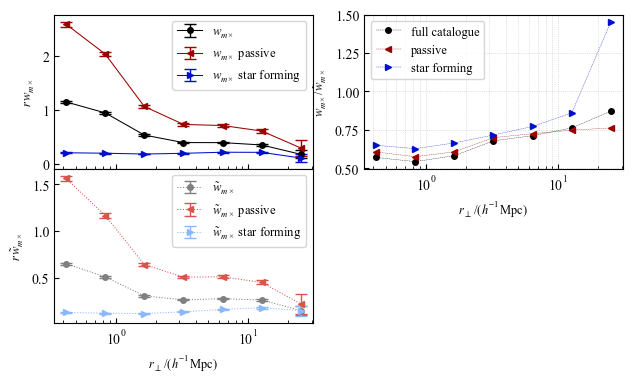

In [19]:
fig = plt.figure(figsize=(22/3, 4))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1], wspace=0.2, hspace=0)
ax1 = fig.add_subplot(gs[0, 0])
ax1.errorbar(
    r, np.mean(r_wdp, axis=0), yerr=np.std(r_wdp, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='k',
    label=r'$ w_{m\times}$ ', marker='o', markersize=4,alpha=1
)
ax1.errorbar(
    r, np.mean(r_wdp_ell, axis=0), yerr=np.std(r_wdp_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='xkcd:deep red',
    label=r'$w_{m\times}$ passive', marker='<', markersize=4,alpha=1
)
ax1.errorbar(
    r, np.mean(r_wdp_spi, axis=0), yerr=np.std(r_wdp_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='xkcd:true blue',
    label=r'$ w_{m\times}$ star forming', marker='>', markersize=4,alpha=1
)
# ax1.grid(which='both', axis='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax1.tick_params(direction='in',axis='both', which='both')
ax1.legend(fontsize=9, loc='best')
ax1.set_xscale('log')
ax1.set_ylabel(r"$r\, w_{m\times}$",fontsize=9)
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax2.errorbar(
    r, np.mean(r_wdp_noMAG, axis=0), yerr=np.std(r_wdp_noMAG, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=4, color='0.5',
    label=r'$ \tilde w_{m\times}$', marker='o', markersize=4,alpha=1
)
ax2.errorbar(
    r, np.mean(r_wdp_noMAG_ell, axis=0), yerr=np.std(r_wdp_noMAG_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=4, color='xkcd:pale red',
    label=r'$\tilde w_{m\times}$ passive', marker='<', markersize=4,alpha=1
)
ax2.errorbar(
    r, np.mean(r_wdp_noMAG_spi, axis=0), yerr=np.std(r_wdp_noMAG_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=4, color='xkcd:carolina blue',
    label=r'$ \tilde w_{m\times}$ star forming', marker='>', markersize=4,alpha=1
)
# ax2.grid(which='both', axis='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax2.tick_params(direction='in',axis='both', which='both')
ax2.legend(fontsize=9, loc='best')
ax2.set_xscale('log')
ax2.set_xlabel(r"$r_\perp \, /(h^{-1} \, \mathrm{Mpc})$",fontsize=9)
ax2.set_ylabel(r"$r\,\tilde w_{m\times}$",fontsize=9)
ax3 = fig.add_subplot(gs[0, 1])
ax3.plot(
    r,  np.mean(r_wdp_noMAG/ np.mean(r_wdp, axis=0) , axis=0), lw=.25,
    linestyle='--', color='k', label=r'full catalogue', marker='o', markersize=4
)
ax3.plot(
    r, np.mean(r_wdp_noMAG_ell, axis=0)/np.mean(r_wdp_ell, axis=0), lw=.25,
    linestyle='--', color='xkcd:deep red', label=r'passive', marker='<', markersize=4
)
ax3.plot(
    r,  np.mean(r_wdp_noMAG_spi, axis=0)/np.mean(r_wdp_spi, axis=0), lw=.25,
    linestyle='--', color='xkcd:true blue', label=r'star forming', marker='>', markersize=4
)
ax3.grid(which='both', axis='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax3.tick_params(direction='in',axis='both', which='both')
ax3.legend(fontsize=9, loc='best')
ax3.set_xscale('log')
ax3.set_xlabel(r"$r_\perp \, /(h^{-1} \, \mathrm{Mpc})$",fontsize=9)
ax3.set_ylabel(r"$w_{m\times}/ \tilde w_{m\times}$",fontsize=9)

# ax3.set_position([0.55, 0.4, 0.38, 0.48])
#set_position([left, bottom, width, height])
ax4 = fig.add_subplot(gs[1, 1])
ax4.axis('off')
plt.savefig(
    '/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/all wdp wdx3.pdf',
    dpi=300, bbox_inches='tight'
)
plt.show()

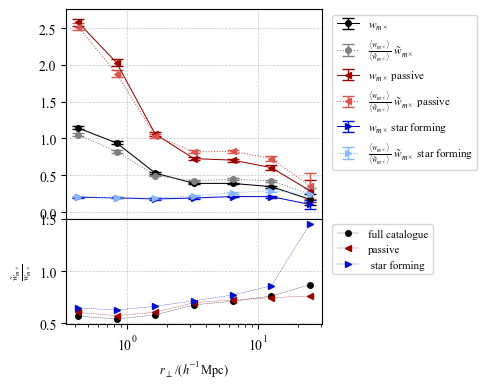

In [20]:
f_scalar = np.mean(r_wdp)/np.mean(r_wdp_noMAG)
r_scalar = np.mean(r_wdp_ell)/np.mean(r_wdp_noMAG_ell)
b_scalar = np.mean(r_wdp_spi)/np.mean(r_wdp_noMAG_spi)
# print(f_scalar, r_scalar, b_scalar)
fig = plt.figure(figsize=(15/3, 4))  # Adjust the figure size as needed
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1], hspace=0.0)  # Reduce vertical space

# Upper plot: Original data
ax1 = fig.add_subplot(gs[0])
ax1.errorbar(
    r, np.mean(r_wdp, axis=0), yerr=np.std(r_wdp, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='k',
    label=r'$ w_{m\times}$ ', marker='o', markersize=4,alpha=1
)
ax1.errorbar(
    r, f_scalar*np.mean(r_wdp_noMAG, axis=0), yerr=f_scalar*np.std(r_wdp_noMAG, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=4, color='0.5',
    label=r'$\frac{\langle w_{m\times}\rangle}{\langle\tilde w_{m\times}\rangle}\,\, \tilde w_{m\times}$', marker='o', markersize=4,alpha=1
)
ax1.errorbar(
    r, np.mean(r_wdp_ell, axis=0), yerr=np.std(r_wdp_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='xkcd:deep red',
    label=r'$w_{m\times}$ passive', marker='<', markersize=4,alpha=1
)
ax1.errorbar(
    r, f_scalar*np.mean(r_wdp_noMAG_ell, axis=0), yerr=f_scalar*np.std(r_wdp_noMAG_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=4, color='xkcd:pale red',
    label=r'$\frac{\langle w_{m\times}\rangle}{\langle\tilde w_{m\times}\rangle}\,\, \tilde w_{m\times}$ passive', marker='<', markersize=4,alpha=1
)
ax1.errorbar(
    r, np.mean(r_wdp_spi, axis=0), yerr=np.std(r_wdp_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='xkcd:true blue',
    label=r'$ w_{m\times}$ star forming', marker='>', markersize=4,alpha=1
)
ax1.errorbar(
    r, f_scalar*np.mean(r_wdp_noMAG_spi, axis=0), yerr=f_scalar*np.std(r_wdp_noMAG_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=4, color='xkcd:carolina blue',
    label=r'$\frac{\langle w_{m\times}\rangle}{\langle\tilde w_{m\times}\rangle}\,\, \tilde w_{m\times}$ star forming', marker='>', markersize=4,alpha=1
)
ax1.set_xscale('log')
# ax1.set_yscale('log')
# ax1.set_ylabel(r'$\langle (w / \tilde w)_{m\times}\rangle$')
ax1.legend(fontsize=8, loc='upper left', bbox_to_anchor=(1.02, 1))
ax1.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Lower plot: Differences
ax2 = fig.add_subplot(gs[1])
ax2.plot(
    r,  np.mean(r_wdp_noMAG/ np.mean(r_wdp, axis=0) , axis=0), lw=.25,
    linestyle='--', color='k', label=r'full catalogue', marker='o', markersize=4
)
ax2.plot(
    r, np.mean(r_wdp_noMAG_ell, axis=0)/np.mean(r_wdp_ell, axis=0), lw=.25,
    linestyle='--', color='xkcd:deep red', label=r'passive', marker='<', markersize=4
)
ax2.plot(
    r,  np.mean(r_wdp_noMAG_spi, axis=0)/np.mean(r_wdp_spi, axis=0), lw=.25,
    linestyle='--', color='xkcd:true blue', label=r' star forming', marker='>', markersize=4
)
ax2.set_xscale('log')
# ax2.set_yscale('log')
ax2.set_xlabel(r"$r_\perp \, /(h^{-1} \, \mathrm{Mpc})$",fontsize=9)
ax2.set_ylabel(r"$ \frac{\tilde w_{m\times} }{ w_{m\times}}$",fontsize=9)
ax2.legend(fontsize=8, loc='upper left', bbox_to_anchor=(1.02, 1))
ax2.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Final adjustments
plt.tight_layout()
plt.savefig(
    '/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/all wdp wdx2.pdf',
    dpi=300, bbox_inches='tight'
)

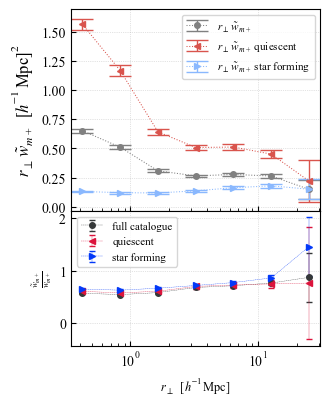

In [23]:
fig = plt.figure(figsize=(10/3, 2.5/3 *5))  # Adjust the figure size as needed
gs = fig.add_gridspec(2, 1, height_ratios=[3, 2], hspace=0.0)  # Reduce vertical space

# Upper plot: Original data
ax1 = fig.add_subplot(gs[0])
ax1.errorbar(
    r, np.mean(r_wdp_noMAG, axis=0), yerr=f_scalar*np.std(r_wdp_noMAG, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=8, color='0.5',
    label=r'$r_\perp \, \tilde w_{m+}$', marker='o', markersize=4,alpha=1
)
ax1.errorbar(
    r, np.mean(r_wdp_noMAG_ell, axis=0), yerr=f_scalar*np.std(r_wdp_noMAG_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=8, color='xkcd:pale red',
    label=r'$r_\perp \, \tilde w_{m+}$ quiescent', marker='<', markersize=4,alpha=1
)
ax1.errorbar(
    r, np.mean(r_wdp_noMAG_spi, axis=0), yerr=f_scalar*np.std(r_wdp_noMAG_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=8, color='xkcd:carolina blue',
    label=r'$r_\perp \, \tilde w_{m+}$ star forming', marker='>', markersize=4,alpha=1
)
ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_ylabel(r'$r_\perp \, \tilde w_{m+}\,\,\,\,[h^{-1} \, \mathrm{Mpc}]^2$')
ax1.legend(fontsize=8, loc='best')
ax1.grid(which='major', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax1.tick_params(direction='in',axis='both', which='both')

# Lower plot: Differences
ax2 = fig.add_subplot(gs[1])
ax2.errorbar(
    r,  np.mean(r_wdp_noMAG,axis=0)/ np.mean(r_wdp, axis=0), yerr=error_ratio, lw=.25,
    linestyle='--', color='#353839', capsize=2, label=r'full catalogue', marker='o', markersize=4
)
ax2.errorbar(
    r, np.mean(r_wdp_noMAG_ell, axis=0)/np.mean(r_wdp_ell, axis=0), yerr=error_ratio_spi,lw=.25,
    linestyle='--', color='#DC143C', capsize=2, label=r'quiescent', marker='<', markersize=4
)
ax2.errorbar(
    r,  np.mean(r_wdp_noMAG_spi, axis=0)/np.mean(r_wdp_spi, axis=0), yerr=error_ratio_ell, lw=.25,
    linestyle='--', color='xkcd:vibrant blue', capsize=2, label=r'star forming', marker='>', markersize=4
)
ax2.set_xscale('log')
# ax2.set_yscale('log')
ax2.set_xlabel(r"$r_\perp \,\,\,\, [h^{-1} \, \mathrm{Mpc}]$",fontsize=9)
ax2.set_ylabel(r"$\frac{ \tilde w_{m+}}{ w_{m+}}$",fontsize=9)
ax2.legend(fontsize=8, loc='best')
ax2.grid(which='major', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax2.tick_params(direction='in',axis='both', which='both')

# Final adjustments
plt.tight_layout()
plt.savefig(
    '/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/all wdp wdx4.pdf',
    dpi=300, bbox_inches='tight'
)

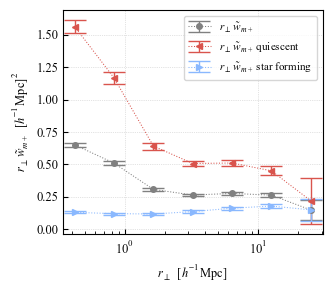

In [34]:
fig = plt.figure(figsize=(10/3, 3))
plt.errorbar(
    r, np.mean(r_wdp_noMAG, axis=0), yerr=f_scalar*np.std(r_wdp_noMAG, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=8, color='0.5',
    label=r'$r_\perp \, \tilde w_{m+}$', marker='o', markersize=4,alpha=1
)
plt.errorbar(
    r, np.mean(r_wdp_noMAG_ell, axis=0), yerr=f_scalar*np.std(r_wdp_noMAG_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=8, color='xkcd:pale red',
    label=r'$r_\perp \, \tilde w_{m+}$ quiescent', marker='<', markersize=4,alpha=1
)
plt.errorbar(
    r, np.mean(r_wdp_noMAG_spi, axis=0), yerr=f_scalar*np.std(r_wdp_noMAG_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=8, color='xkcd:carolina blue',
    label=r'$r_\perp \, \tilde w_{m+}$ star forming', marker='>', markersize=4,alpha=1
)

plt.xscale('log')
plt.ylabel(r'$r_\perp \, \tilde w_{m+}\,\,\,\,[h^{-1} \, \mathrm{Mpc}]^2$',fontsize=9)
plt.xlabel(r"$r_\perp \,\,\,\, [h^{-1} \, \mathrm{Mpc}]$",fontsize=9)
plt.legend(fontsize=8, loc='best')
plt.grid(which='major', linestyle='dotted', linewidth=0.5, alpha=0.7)
plt.tick_params(direction='in',axis='both', which='both')
plt.tight_layout()
plt.savefig(
    '/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/all wdp wdx5.pdf',
    dpi=300, bbox_inches='tight'
)

In [485]:
print(np.mean(r_wdp_ell)/np.mean(r_wdp_spi))
print(np.mean(mean_SSFR_ell)/np.mean(mean_SSFR_spi))

6.2307760457742445
0.010399891281013582


<ErrorbarContainer object of 3 artists>

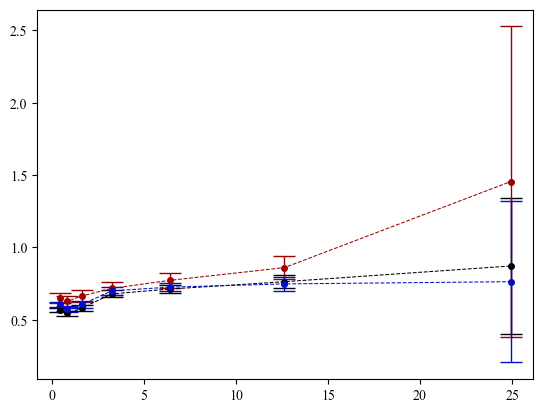

In [22]:
# Means and standard deviations
mean_noMAG = np.mean(r_wdp_noMAG, axis=0)
std_noMAG = np.std(r_wdp_noMAG, axis=0) / sqrtN
mean_wdp = np.mean(r_wdp, axis=0)
std_wdp = np.std(r_wdp, axis=0) / sqrtN

# Ratio of means
ratio = mean_noMAG / mean_wdp
# Propagated error
error_ratio = ratio * np.sqrt((std_noMAG / mean_noMAG) ** 2 + (std_wdp / mean_wdp) ** 2)

# Error bar plot
plt.errorbar(
    r, ratio, yerr=error_ratio,
    linewidth=0.75, linestyle='--', elinewidth=1, capsize=8, color='k',
    label='full catalogue', marker='o', markersize=4
)

mean_noMAG = np.mean(r_wdp_noMAG_spi, axis=0)
std_noMAG = np.std(r_wdp_noMAG_spi, axis=0) / sqrtN
mean_wdp = np.mean(r_wdp_spi, axis=0)
std_wdp = np.std(r_wdp_spi, axis=0) / sqrtN

# Ratio of means
ratio = mean_noMAG / mean_wdp
# Propagated error
error_ratio_spi = ratio * np.sqrt((std_noMAG / mean_noMAG) ** 2 + (std_wdp / mean_wdp) ** 2)

# Error bar plot
plt.errorbar(
    r, ratio, yerr=error_ratio_spi,
    linewidth=0.75, linestyle='--', elinewidth=1, capsize=8, color='xkcd:deep red',
    label='full catalogue', marker='o', markersize=4
)

mean_noMAG = np.mean(r_wdp_noMAG_ell, axis=0)
std_noMAG = np.std(r_wdp_noMAG_ell, axis=0) / sqrtN
mean_wdp = np.mean(r_wdp_ell, axis=0)
std_wdp = np.std(r_wdp_ell, axis=0) / sqrtN

# Ratio of means
ratio = mean_noMAG / mean_wdp
# Propagated error
error_ratio_ell = ratio * np.sqrt((std_noMAG / mean_noMAG) ** 2 + (std_wdp / mean_wdp) ** 2)

# Error bar plot
plt.errorbar(
    r, ratio, yerr=error_ratio_ell,
    linewidth=0.75, linestyle='--', elinewidth=1, capsize=8, color='xkcd:true blue',
    label='full catalogue', marker='o', markersize=4
)

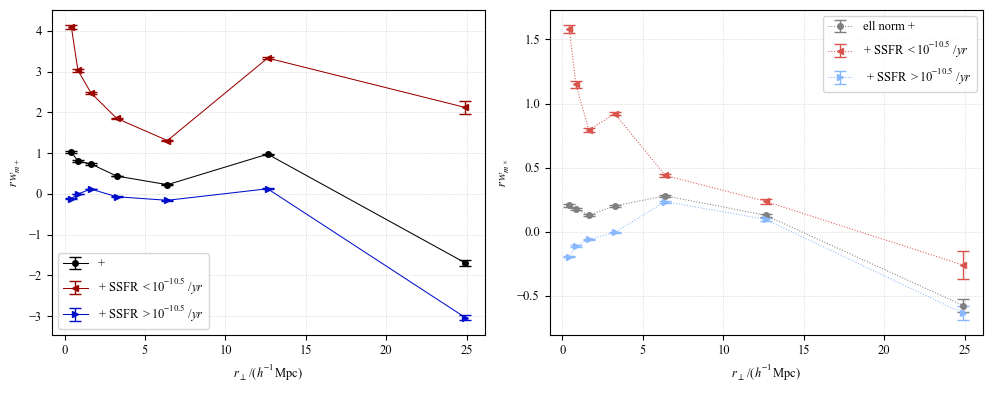

In [16]:
num = 54
sqrtN = np.sqrt(wdp.shape[0])
r_wdp = wdp*r
r_wdx = wdx

r_wdp_noMAG = wdp_noMAG*r
r_wdx_noMAG = wdx_noMAG

r_wdp_spi = wdp_spi*r
r_wdp_ell = wdp_ell*r
r_wdx_spi = wdx_spi
r_wdx_ell = wdx_ell

r_wdp_noMAG_spi = wdp_noMAG_spi*r
r_wdp_noMAG_ell = wdp_noMAG_ell*r
r_wdx_noMAG_spi = wdx_noMAG_spi
r_wdx_noMAG_ell = wdx_noMAG_ell

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30/3, 4))  # Width-to-height ratio adjusted for a clean layout
ax[0].errorbar(
    r, r_wdp[num],  yerr=np.std(r_wdp, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='k',
    label=r'+', marker='o', markersize=4
)
ax[1].errorbar(
    r, r_wdp_noMAG[num], yerr=np.std(r_wdp_noMAG, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=4, color='0.5',
    label=r'ell norm +', marker='o', markersize=4
)
ax[0].errorbar(
    r,r_wdp_ell[num], yerr=np.std(r_wdp_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='xkcd:deep red',
    label=r'+ SSFR $<10^{-10.5}$ $ /yr$', marker='<', markersize=4
)
ax[1].errorbar(
    r, r_wdp_noMAG_ell[num], yerr=np.std(r_wdp_noMAG_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=4, color='xkcd:pale red',
    label=r'+ SSFR $<10^{-10.5}$ $ /yr$', marker='<', markersize=4
)
ax[0].errorbar(
    r, r_wdp_spi[num], yerr=np.std(r_wdp_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='xkcd:true blue',
    label=r'+ SSFR $>10^{-10.5}$ $ /yr$', marker='>', markersize=4
)
ax[1].errorbar(
    r, r_wdp_noMAG_spi[num], yerr=np.std(r_wdp_noMAG_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=4, color='xkcd:carolina blue',
    label=r' + SSFR $>10^{-10.5}$ $ /yr$', marker='>', markersize=4
)


ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax[0].set_xlabel(r"$r_\perp \, /(h^{-1} \, \mathrm{Mpc})$",fontsize=9)
ax[0].set_ylabel(r"$r\,w_{m+}$",fontsize=9)
ax[0].legend()
ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax[1].set_xlabel(r"$r_\perp \, /(h^{-1} \, \mathrm{Mpc})$",fontsize=9)
ax[1].set_ylabel(r"$r\,w_{m\times}$",fontsize=9)
ax[1].legend()
fig.tight_layout()

In [17]:
lims_kde = [[0.06,0.54],[0.56,1.04],1.2*np.log([0.25,4.0]),1.2*np.log([0.25,4.0]),1.2*np.log([0.5,2.0]),1.2*np.log([0.5,2.0])]


In [18]:
# SAVING PEARSON VALUES
pearsons_corr = -np.ones((6,6))
p_vals_corr = -np.ones((6,6))
# from sklearn.decomposition import PCA

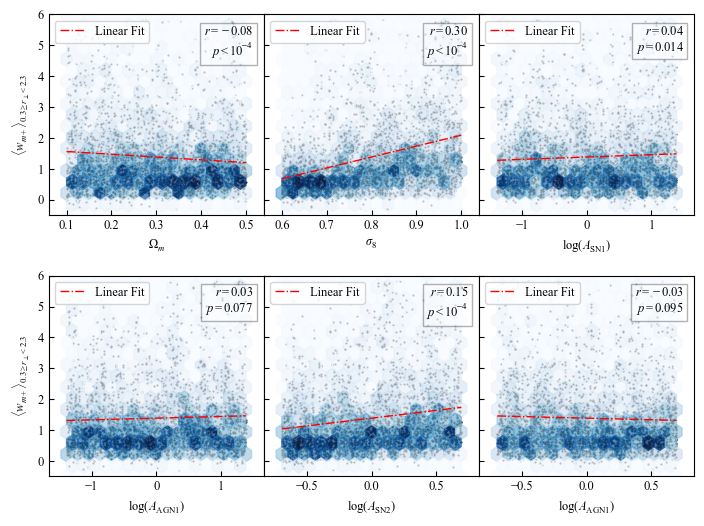

In [59]:
corr_data = wdp[:,:3]#/wdd[:,:3]
weights = 1#/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights

fig = plt.figure(figsize=(25 / 3, 6))
gs = fig.add_gridspec(2, 3, wspace=0, hspace=0.3)  # Set wspace=0 to remove horizontal spacing
axes = []
for row in range(2):
    for col in range(3):
        ax = fig.add_subplot(gs[row, col])
        axes.append(ax)

# Flatten the axes for easy iteration
for param, ax in enumerate(axes):
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])
    pearsons_corr[0,param] = pearson_coeff; p_vals_corr[0,param] = p_value

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")

    # Add text for Pearson correlation and p-value
    if p_value > 1e-4:
        ax.text(
            0.95,
            0.95,
            f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
            transform=ax.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3),
        )
    else:
        ax.text(
            0.95,
            0.95,
            f"$r={pearson_coeff:.2f}$\n" + r'$p<10^{-4}$',
            transform=ax.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3),
        )

    ax.scatter(corr_labels[:, param], avg_corr, s=0.4, color='black', alpha=.7, label="")
    ax.hexbin(
        corr_labels[:, param],
        avg_corr,
        gridsize=16,
        extent=(lims[param][0], lims[param][1], -0.5, 6),
        cmap="Blues",
        alpha=0.7,
    )
#     sns.kdeplot(
#     x=corr_labels[:, param], y=avg_corr,
#     fill=True, levels=4, cmap='Blues', alpha=.7, ax=ax)

    ax.set_xlabel(f"${simpars[param]}$", fontsize=9)
    if param % 3 == 0:  # Add y-label only for the first column
        ax.set_ylabel(r"$\langle w_{m+} \rangle_{0.3\geq r_\perp<2.3}$", fontsize=9)
    else:
        ax.set_yticklabels([])

    ax.legend(fontsize=9, loc="upper left")
    ax.tick_params(direction="in")
    ax.set_ylim([-0.5, 6])
    ax.set_xlim([min(lims_kde[param]), max(lims_kde[param])])

plt.savefig(
    "/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/wdp.pdf",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

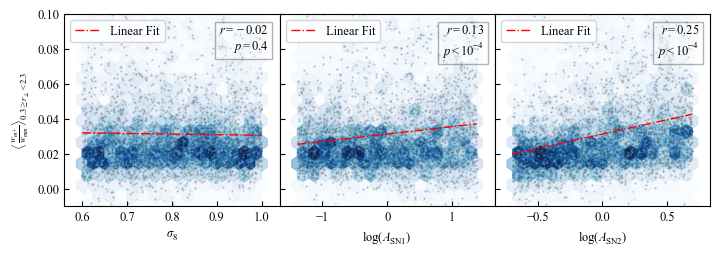

In [60]:
corr_data = wdp[:,:3]/wdd[:,:3]
weights = 1#/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights

fig = plt.figure(figsize=(25 / 3, 2.5))  # Adjust figure size for a single row
gs = fig.add_gridspec(1, 3, wspace=0)  # Single row, 3 columns, with some horizontal spacing

axes = []
for col in range(3):  # Create 3 subplots in one row
    ax = fig.add_subplot(gs[0, col])
    axes.append(ax)

select = [1, 2, 4]
for i, ax in enumerate(axes):
    param = select[i]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])
    pearsons_corr[0,param] = pearson_coeff; p_vals_corr[0,param] = p_value

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")

    # Add text for Pearson correlation and p-value
    if p_value > 1e-4:
        ax.text(
            0.95,
            0.95,
            f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
            transform=ax.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3),
        )
    else:
        ax.text(
            0.95,
            0.95,
            f"$r={pearson_coeff:.2f}$\n" + r'$p<10^{-4}$',
            transform=ax.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3),
        )

    ax.scatter(corr_labels[:, param], avg_corr, s=0.4, color='black', alpha=.7, label="")
    ax.hexbin(
        corr_labels[:, param],
        avg_corr,
        gridsize=16,
        extent=(lims[param][0], lims[param][1], -0.01, .1),
        cmap="Blues",
        alpha=0.7,
    )
#     sns.kdeplot(
#     x=corr_labels[:, param], y=avg_corr,
#     fill=True, levels=4, cmap='Blues', alpha=.7, ax=ax)

    ax.set_xlabel(f"${simpars[param]}$", fontsize=9)
    if i % 3 == 0:  # Add y-label only for the first column
        ax.set_ylabel(r"$\langle\, \frac{w_{m+}}{w_{mm}} \rangle_{0.3\geq r_\perp<2.3}$", fontsize=9)
    else:
        ax.set_yticklabels([])

    ax.legend(fontsize=9, loc="upper left")
    ax.tick_params(direction="in")
    ax.set_ylim([-0.01, .1])
    ax.set_xlim([min(lims_kde[param]), max(lims_kde[param])])

plt.savefig(
"/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/wdp div wdd.pdf",
dpi=300,
bbox_inches="tight",
)

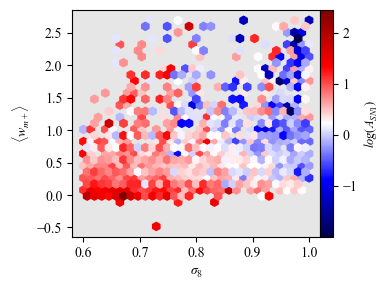

In [89]:
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12/3,3))
fig = plt.figure(figsize=(12 / 3, 3))  # Set the figure size
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0, hspace=0)  # Create a gridspec without spacing

# scatter = ax.scatter(corr_labels[:,1], np.mean(wdp_spi[:,:],axis=1), s=1, c=np.log(split_fracs), cmap=mpl.cm.cool_r,alpha=0.7,label="")
ax = fig.add_subplot(gs[0])
ax.set_facecolor('.9')
col_data = corr_labels[:,1]
avg_corr = np.mean(wdp[:,:],axis=1)
hb = ax.hexbin(
    col_data, avg_corr, C=np.log(1/split_fracs), 
    gridsize=31,  # Adjust the resolution of the bins
    cmap=mpl.cm.seismic, #inferno
    reduce_C_function=np.mean,
    extent=(min(col_data), max(col_data), min(avg_corr), 0.4*max(avg_corr))
    )

c_ax = fig.add_subplot(gs[1])  # Create a separate axis for the colorbar
cbar = plt.colorbar(hb, cax=c_ax, orientation='vertical')
# cbar.set_label(c_label)

ax.set_ylabel(r'$\langle w_{m+} \rangle$')
ax.set_xlabel(f'${simpars[1]}$')
# cbar = fig.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label('$log(A_{SN1})$', fontsize=9)
fig.tight_layout()

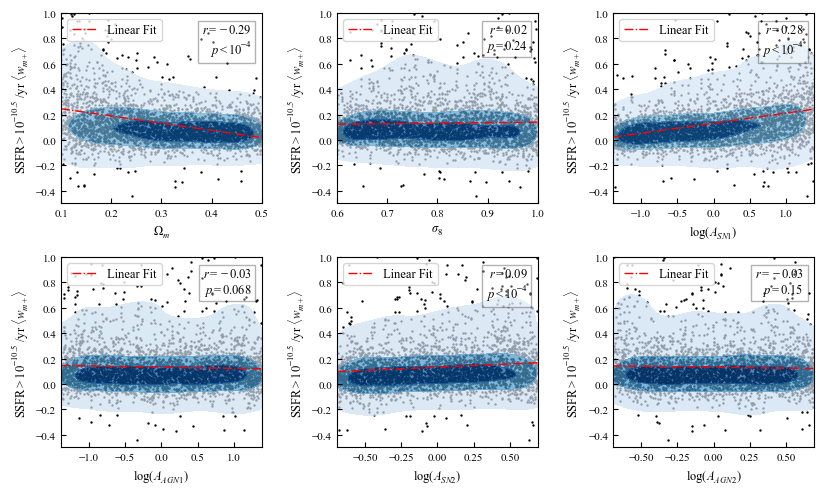

In [372]:
corr_data = wdp_spi[:,:]#/wdd[:,:4]
weights = 1#/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])
    pearsons_corr[1,param] = pearson_coeff; p_vals_corr[1,param] = p_value
    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
#     ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -.5, 1),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.5, color='black',alpha=1,label="")
    sns.kdeplot(
    x=corr_labels[:, param], y=avg_corr,
    fill=True, levels=4, cmap='Blues', alpha=0.7, ax=ax)
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"SSFR$>10^{-10.5}$ /yr $\langle w_{m+} \rangle$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([-.5, 1])
    ax.set_xlim([min(lims[param]), max(lims[param])])
plt.tight_layout()

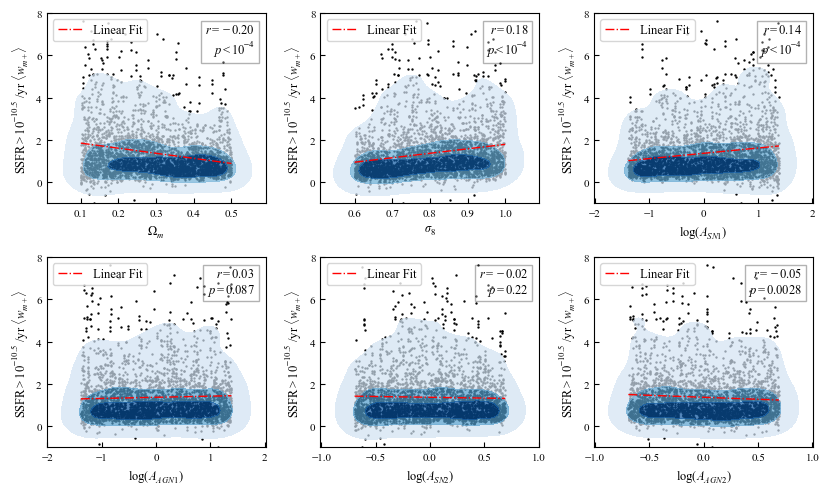

In [373]:
corr_data = wdp_ell[:,:]#/wdd[:,:4]
weights = 1#/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])
    pearsons_corr[2,param] = pearson_coeff; p_vals_corr[2,param] = p_value
    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
#     ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -1,8),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.5, color='black',alpha=1,label="")
    sns.kdeplot(
    x=corr_labels[:, param], y=avg_corr,
    fill=True, levels=4, cmap='Blues', alpha=0.7, ax=ax)
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"SSFR$>10^{-10.5}$ /yr $\langle w_{m+} \rangle$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([-1, 8])
plt.tight_layout()

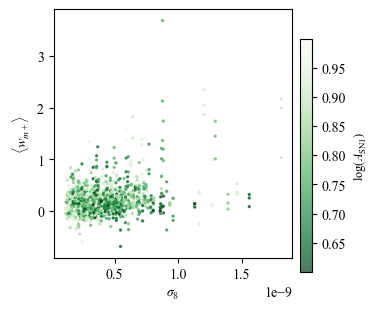

In [67]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10/3,3))
scatter = ax.scatter(mean_SSFR_spi, np.mean(wdp_spi[:,:],axis=1), s=2, c=corr_labels[:,1], cmap=mpl.cm.Greens_r,alpha=0.7,label="")
ax.set_ylabel(r'$\langle w_{m+} \rangle$')
ax.set_xlabel(f'${simpars[1]}$')
cbar = fig.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label(f'${simpars[2]}$', fontsize=9)
fig.set_constrained_layout(True)

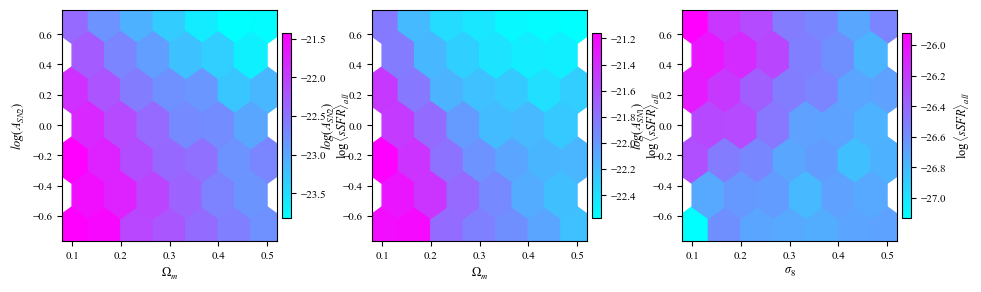

In [49]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(34/3,3))
hb = ax[0].hexbin(
    corr_labels[:, 0], corr_labels[:, 4], 
    C=np.log(mean_SSFR), 
    gridsize=6,  # Adjust the resolution of the bins
    cmap=mpl.cm.cool, 
    reduce_C_function=np.mean  # Aggregate using the mean value of log(SFR) within each bin
)
ax[0].set_xlabel(f'${simpars[0]}$')
ax[0].set_ylabel(f'${simpars[4]}$')
cbar = fig.colorbar(hb, ax=ax[0], orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label(r'$\log\langle sSFR \rangle_{all}$ ', fontsize=9)
hb = ax[1].hexbin(
    corr_labels[:, 0], corr_labels[:, 4], 
    C=np.log(mean_SSFR_spi), 
    gridsize=6,  # Adjust the resolution of the bins
    cmap=mpl.cm.cool, 
    reduce_C_function=np.mean  # Aggregate using the mean value of log(SFR) within each bin
)
ax[1].set_xlabel(f'${simpars[0]}$')
ax[1].set_ylabel(f'${simpars[4]}$')
cbar = fig.colorbar(hb, ax=ax[1], orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label(r'$\log\langle sSFR \rangle_{all}$ ', fontsize=9)

hb = ax[2].hexbin(
    corr_labels[:, 0], corr_labels[:, 4], 
    C=np.log(mean_SSFR_ell), 
    gridsize=6,  # Adjust the resolution of the bins
    cmap=mpl.cm.cool, 
    reduce_C_function=np.mean  # Aggregate using the mean value of log(SFR) within each bin
)
ax[2].set_xlabel(f'${simpars[1]}$')
ax[2].set_ylabel(f'${simpars[2]}$')
cbar = fig.colorbar(hb, ax=ax[2], orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label(r'$\log\langle sSFR \rangle_{all}$ ', fontsize=9)

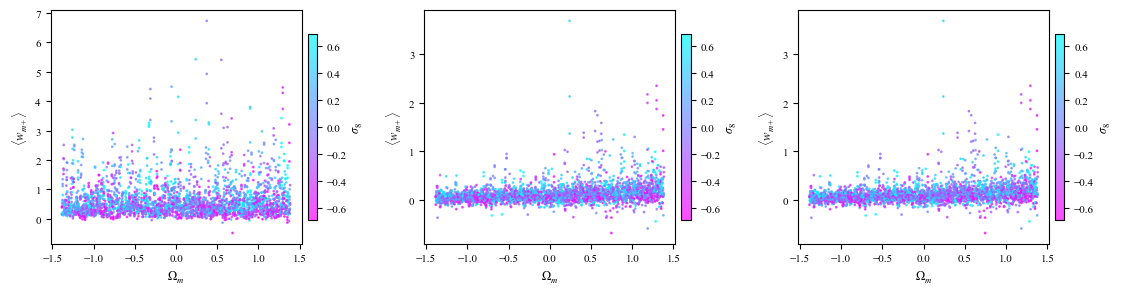

In [50]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(34/3,3))
scatter = ax[0].scatter(corr_labels[:,2], np.mean(wdp[:,:],axis=1), s=1, c=corr_labels[:,4], cmap=mpl.cm.cool_r,alpha=0.7,label="")
ax[0].set_ylabel(r'$\langle w_{m+} \rangle$')
ax[0].set_xlabel(f'${simpars[0]}$')
cbar = fig.colorbar(scatter, ax=ax[0], orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label(f'${simpars[1]}$', fontsize=9)

scatter = ax[1].scatter(corr_labels[:,2], np.mean(wdp_spi[:,:],axis=1), s=1, c=corr_labels[:,4], cmap=mpl.cm.cool_r,alpha=0.7,label="")
ax[1].set_ylabel(r'$\langle w_{m+} \rangle$')
ax[1].set_xlabel(f'${simpars[0]}$')
cbar = fig.colorbar(scatter, ax=ax[1], orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label(f'${simpars[1]}$', fontsize=9)

scatter = ax[2].scatter(corr_labels[:,2], np.mean(wdp_spi[:,:],axis=1), s=1, c=corr_labels[:,4], cmap=mpl.cm.cool_r,alpha=0.7,label="")
ax[2].set_ylabel(r'$\langle w_{m+} \rangle$')
ax[2].set_xlabel(f'${simpars[0]}$')
cbar = fig.colorbar(scatter, ax=ax[2], orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label(f'${simpars[1]}$', fontsize=9)

fig.tight_layout()

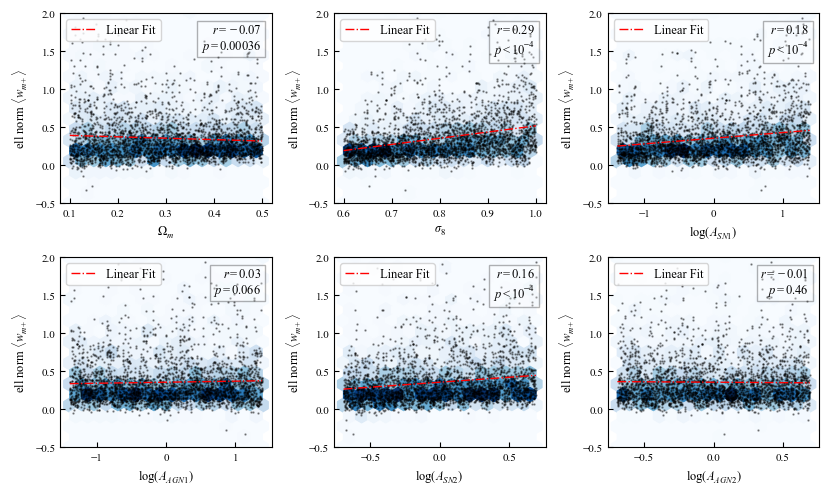

In [374]:
corr_data = wdp_noMAG[:,:]#/wdd[:,:]
weights = 1#/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])
    pearsons_corr[3,param] = pearson_coeff; p_vals_corr[3,param] = p_value
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -.5,2),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.5, color='black',alpha=0.4,label="")
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"ell norm $\langle w_{m+} \rangle$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([-.5, 2])
plt.tight_layout()

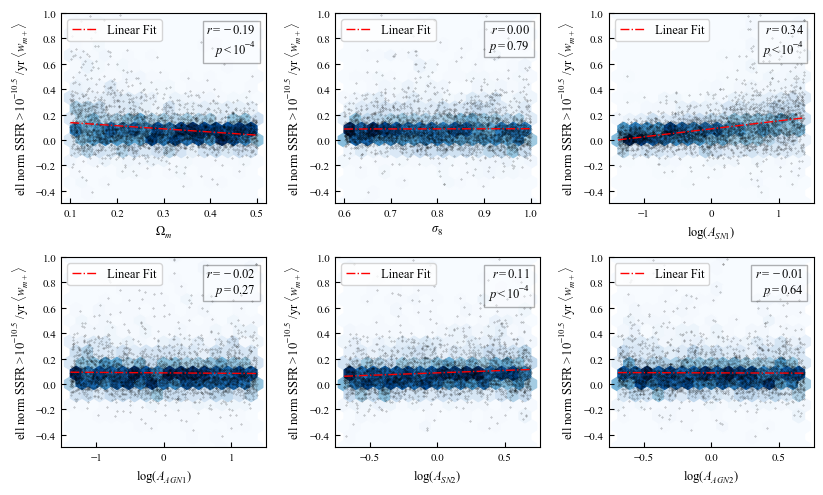

In [375]:
corr_data = wdp_noMAG_spi[:,:]#/wdd[:,:]
weights = 1#/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])
    pearsons_corr[4,param] = pearson_coeff; p_vals_corr[4,param] = p_value
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -.5,1),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.1, color='black',alpha=0.4,label="")
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"ell norm SSFR$>10^{-10.5}$ /yr $\langle w_{m+} \rangle$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([-.5, 1])
plt.tight_layout()

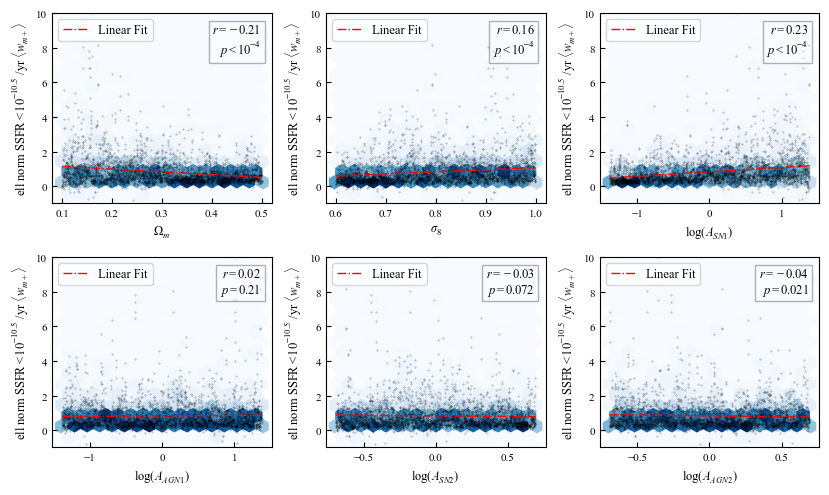

In [376]:
corr_data = wdp_noMAG_ell[:,:]#/wdd[:,:]
weights = 1#/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])
    pearsons_corr[5,param] = pearson_coeff; p_vals_corr[5,param] = p_value
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -1,10),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.1, color='black',alpha=0.4,label="")
    
#     sns.kdeplot(
#     x=corr_labels[:, param], y=avg_corr,
#     fill=True, levels=6, cmap='Blues', alpha=0.7, ax=ax
#     )
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"ell norm SSFR$<10^{-10.5}$ /yr $\langle w_{m+} \rangle$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([-1, 10])
plt.tight_layout()

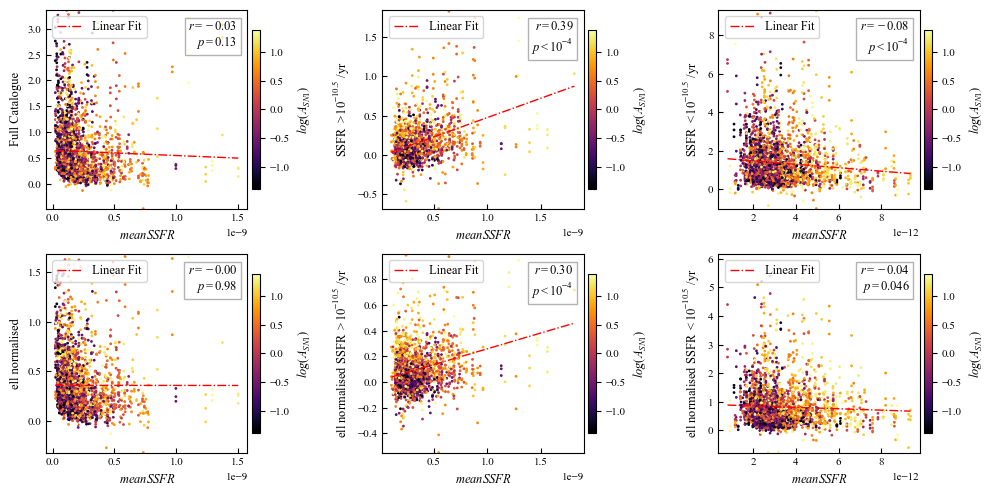

In [51]:
corr_list = [wdp, wdp_spi, wdp_ell, wdp_noMAG, wdp_noMAG_spi, wdp_noMAG_ell]
mean_SSFRs = [mean_SSFR, mean_SSFR_spi, mean_SSFR_ell, mean_SSFR, mean_SSFR_spi, mean_SSFR_ell]

fig, axes = plt.subplots(2, 3, figsize=(30/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
for param in range(6):
    ax = axes[param]
    corr_data = corr_list[param]#/wdd[:,:]
    weights = 1#/np.std(corr_data,axis=0)
    wtd_corr_data = corr_data*weights
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, mean_SSFRs[param])
#     pearsons_corr[5,param] = pearson_coeff; p_vals_corr[5,param] = p_value
    slope, intercept = np.polyfit(mean_SSFRs[param], avg_corr, 1)
    x_vals = np.linspace(min(mean_SSFRs[param]), max(mean_SSFRs[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
#     ax.hexbin(mean_SSFRs[param], avg_corr, gridsize=16, extent=(min(mean_SSFRs[param]), max(mean_SSFRs[param]), min(avg_corr),0.5*max(avg_corr)),cmap='Blues')
    hb = ax.scatter(mean_SSFRs[param], avg_corr, s=1, c=corr_labels[:,2], cmap=mpl.cm.inferno,alpha=1,label="")
    cbar = fig.colorbar(hb, ax=ax, orientation='vertical', shrink=0.8, pad=0.02)
    cbar.set_label(f"${simpars[2]}$", fontsize=9)
    ax.set_xlabel(f"$mean SSFR$",fontsize=9)
    ax.set_ylabel(catalogues[param],fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([ min(avg_corr),0.5*max(avg_corr)])
#     ax.set_xscale('log'); 
plt.tight_layout()

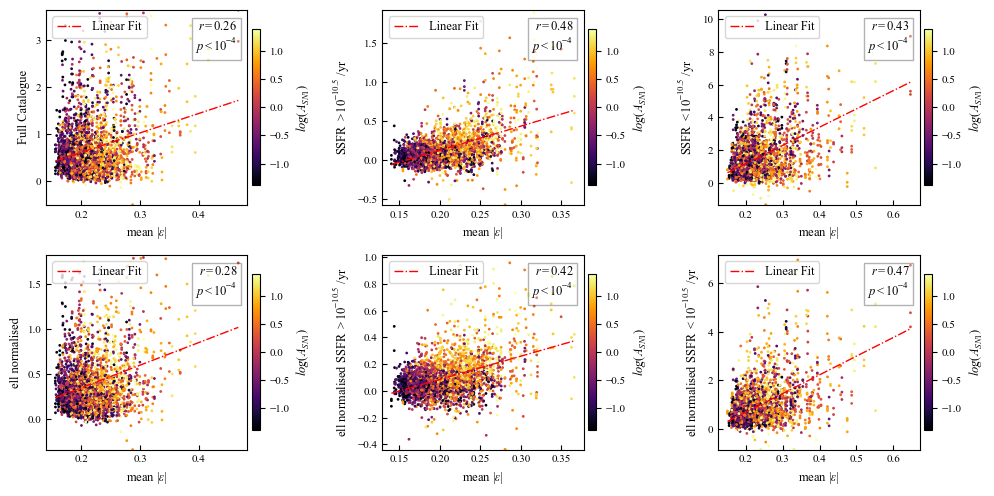

In [150]:
corr_list = [wdp, wdp_spi, wdp_ell, wdp_noMAG, wdp_noMAG_spi, wdp_noMAG_ell]
mean_es = [mean_e, mean_e_spi, mean_e_ell, mean_e, mean_e_spi, mean_e_ell]

fig, axes = plt.subplots(2, 3, figsize=(30/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
for param in range(6):
    ax = axes[param]
    corr_data = corr_list[param]#/wdd[:,:]
    weights = 1#/np.std(corr_data,axis=0)
    wtd_corr_data = corr_data*weights
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, mean_es[param])
#     pearsons_corr[5,param] = pearson_coeff; p_vals_corr[5,param] = p_value
    slope, intercept = np.polyfit(mean_es[param], avg_corr, 1)
    x_vals = np.linspace(min(mean_es[param]), max(mean_es[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
#     ax.hexbin(mean_es[param], avg_corr, gridsize=16, extent=(min(mean_es[param]), max(mean_es[param]), min(avg_corr),0.5*max(avg_corr)),cmap='Blues')
    ax.scatter(mean_es[param], avg_corr, s=1, c=corr_labels[:,2], cmap=mpl.cm.inferno,alpha=1,label="")
    cbar = fig.colorbar(hb, ax=ax, orientation='vertical', shrink=0.8, pad=0.02)
    cbar.set_label(f"${simpars[2]}$", fontsize=9)
#     sns.kdeplot(
#         x=mean_es[param], y=avg_corr,
#         fill=True, levels=6, cmap='Blues', alpha=0.7, ax=ax
#     )
    
    ax.set_xlabel(f"mean $|\epsilon|$",fontsize=9)
    ax.set_ylabel(catalogues[param],fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([ min(avg_corr),0.5*max(avg_corr)])
#     ax.set_xscale('log')
plt.tight_layout()

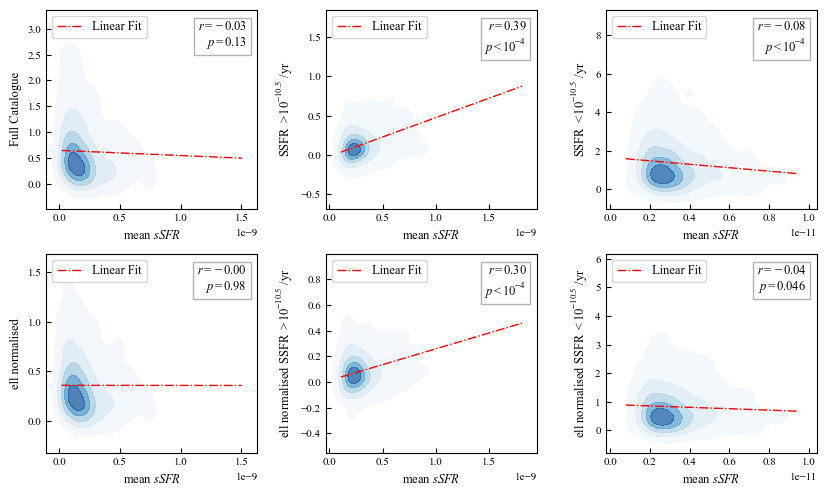

In [52]:
corr_list = [wdp, wdp_spi, wdp_ell, wdp_noMAG, wdp_noMAG_spi, wdp_noMAG_ell]
mean_SSFRs = [mean_SSFR, mean_SSFR_spi, mean_SSFR_ell, mean_SSFR, mean_SSFR_spi, mean_SSFR_ell]
fig, axes = plt.subplots(2, 3, figsize=(25 / 3, 5))  # 2 rows, 3 columns
axes = axes.flatten()

for param in range(6):
    ax = axes[param]
    corr_data = corr_list[param]
    weights = 1  # Placeholder for your weighting logic
    wtd_corr_data = corr_data * weights
    avg_corr = np.mean(wtd_corr_data, axis=1)
    
    pearson_coeff, p_value = pearsonr(mean_SSFRs[param], avg_corr)
    slope, intercept = np.polyfit(mean_SSFRs[param], avg_corr, 1)
    x_vals = np.linspace(min(mean_SSFRs[param]), max(mean_SSFRs[param]), 10)
    y_vals = slope * x_vals + intercept

    # Probability contour plot
    sns.kdeplot(
        x=mean_SSFRs[param], y=avg_corr,
        fill=True, levels=6, cmap='Blues', alpha=0.7, ax=ax
    )
    # Add the trend line
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")

    # Display correlation coefficient and p-value
    if p_value > 1e-4:
        ax.text(0.95, 0.95,
                f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
                transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n" + r'$p<10^{-4}$', transform=ax.transAxes,
                fontsize=9, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))

    # Set labels and formatting
    ax.set_xlabel(f"mean $sSFR$", fontsize=9)
    ax.set_ylabel(catalogues[param], fontsize=9)
    ax.legend(fontsize=9, loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([min(avg_corr), 0.5 * max(avg_corr)])

plt.tight_layout()
plt.show()


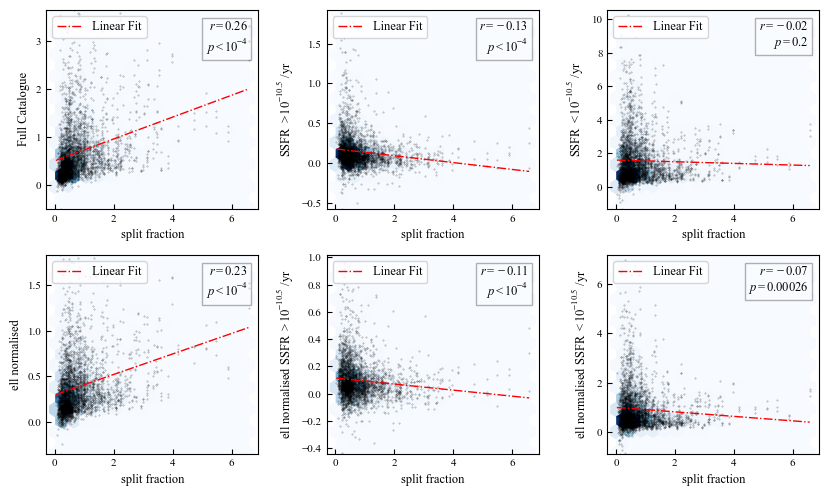

In [131]:
corr_list = [wdp, wdp_spi, wdp_ell, wdp_noMAG, wdp_noMAG_spi, wdp_noMAG_ell]
mean_SSFRs = [split_fracs, split_fracs, split_fracs, split_fracs, split_fracs, split_fracs]

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
for param in range(6):
    ax = axes[param]
    corr_data = corr_list[param]#/wdd[:,:]
    weights = 1#/np.std(corr_data,axis=0)
    wtd_corr_data = corr_data*weights
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, mean_SSFRs[param])
#     pearsons_corr[5,param] = pearson_coeff; p_vals_corr[5,param] = p_value
    slope, intercept = np.polyfit(mean_SSFRs[param], avg_corr, 1)
    x_vals = np.linspace(min(mean_SSFRs[param]), max(mean_SSFRs[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.hexbin(mean_SSFRs[param], avg_corr, gridsize=16, extent=(min(mean_SSFRs[param]), max(mean_SSFRs[param]), min(avg_corr),0.5*max(avg_corr)),cmap='Blues')
    ax.scatter(mean_SSFRs[param], avg_corr, s=0.1, color='black',alpha=0.4,label="")
    
    ax.set_xlabel(f"split fraction",fontsize=9)
    ax.set_ylabel(catalogues[param],fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([ min(avg_corr),0.5*max(avg_corr)])
#     ax.set_xscale('log')
plt.tight_layout()

In [384]:
print(pearsons_corr.T)

[[-0.08200026 -0.29213549 -0.20080698 -0.06511623 -0.19458864 -0.21018572]
 [ 0.29551073  0.02136214  0.17673289  0.28740162  0.00476933  0.15831199]
 [ 0.05585721  0.28366795  0.14489234  0.18272666  0.34329769  0.23351266]
 [ 0.03524122 -0.0332834   0.0312278   0.03362159 -0.02005036  0.02309481]
 [ 0.15473415  0.08953448 -0.02229124  0.1597452   0.10515054 -0.03283717]
 [-0.03122935 -0.02614342 -0.05456258 -0.01363385 -0.00857417 -0.04212104]]


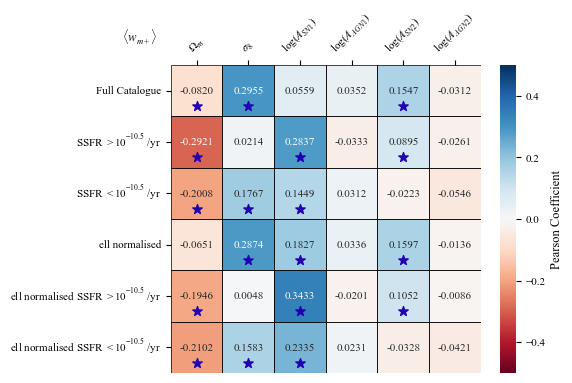

In [377]:
catalogues = ['Full Catalogue', 'SSFR $>10^{-10.5}$ /yr', 'SSFR $<10^{-10.5}$ /yr', 'ell normalised', 'ell normalised SSFR $>10^{-10.5}$ /yr', 'ell normalised SSFR $<10^{-10.5}$ /yr']
simpars_ = [r'$\Omega_m$', r'$\sigma_8$', r'$\log(A_{SN1})$', r'$\log(A_{AGN1})$', r'$\log(A_{SN2})$', r'$\log(A_{AGN2})$']
significance_mask = p_vals_corr < 1e-4
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5, 4)); 
sns.heatmap(
    pearsons_corr, 
    annot=True,  
    fmt=".4f", 
    cmap="RdBu",  
    vmin=-.5, vmax=.5,  
    yticklabels=catalogues, 
    xticklabels=simpars_, ax=ax,
    cbar_kws={'label': 'Pearson Coefficient'}  
)
for y in range(pearsons_corr.shape[0]):  
    for x in range(pearsons_corr.shape[1]):  # Loop over columns
        if significance_mask[y, x]:  # Check if p-value is significant
            ax.scatter(x + 0.5, y + 0.8, color='xkcd:ultramarine', marker='*',s=50, zorder=10)  # Small dot
        ax.add_patch(plt.Rectangle((x, y), 1, 1, fill=False, edgecolor='xkcd:black', lw=0.5))  # Add border
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(axis='x', rotation=45)
ax.text(-0.1, 1.09, r'$\langle w_{m+} \rangle$', fontsize=9, ha='center', va='center', transform=ax.transAxes)
plt.savefig(
    '/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/corr_param pearson table.pdf',
    dpi=300, bbox_inches='tight'
)

In [233]:
corr_labels.shape

(3000, 7)

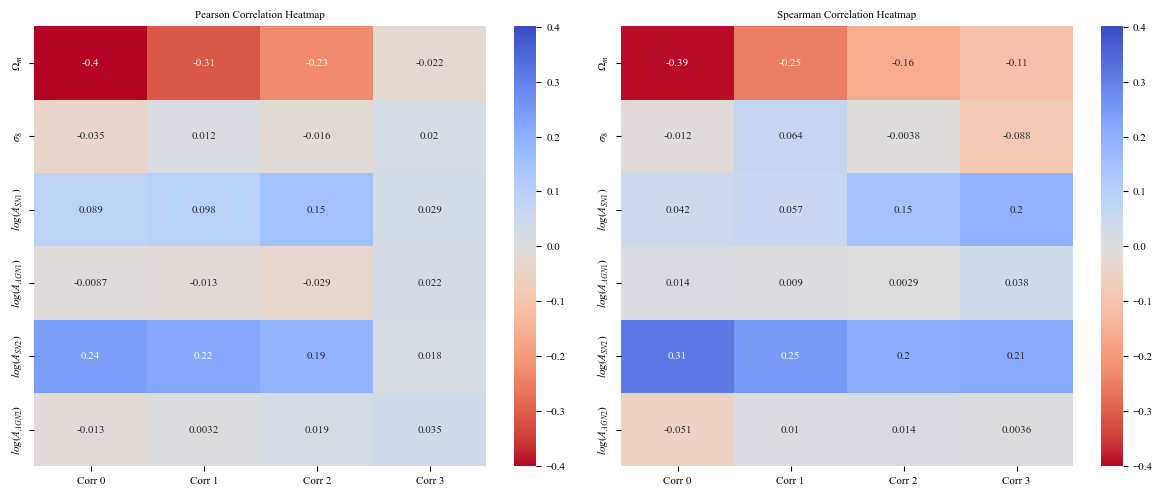

In [262]:
from scipy.stats import pearsonr, spearmanr
corr_data = wdp[:,:4]/wdd[:,:4]
weights = 1/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights
pearson_matrix = np.zeros((corr_labels.shape[1], corr_data.shape[1]))
spearman_matrix = np.zeros((corr_labels.shape[1], corr_data.shape[1]))

for j in range(corr_labels.shape[1]):  # Loop over label dimensions
    for k in range(corr_data.shape[1]):  # Loop over correlation dimensions
        pearson_matrix[j, k], _ = pearsonr(corr_labels[:, j], wtd_corr_data[:, k])
        spearman_matrix[j, k], _ = spearmanr(corr_labels[:, j], wtd_corr_data[:, k])

# Create heatmaps
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(pearson_matrix, annot=True, cmap="coolwarm_r", vmin=-np.max(abs(pearson_matrix)), vmax=np.max(abs(pearson_matrix)),
            xticklabels=[f"Corr {i}" for i in range(corr_data.shape[1])], 
            yticklabels=[f"${simpars[i]}$" for i in range(corr_labels.shape[1])])
plt.title("Pearson Correlation Heatmap")

plt.subplot(1, 2, 2)
sns.heatmap(spearman_matrix, annot=True, cmap="coolwarm_r", vmin=-np.max(abs(pearson_matrix)), vmax=np.max(abs(pearson_matrix))
            , xticklabels=[f"Corr {i}" for i in range(corr_data.shape[1])], 
            yticklabels=[f"${simpars[i]}$" for i in range(corr_labels.shape[1])])
plt.title("Spearman Correlation Heatmap")

plt.tight_layout()
plt.show()

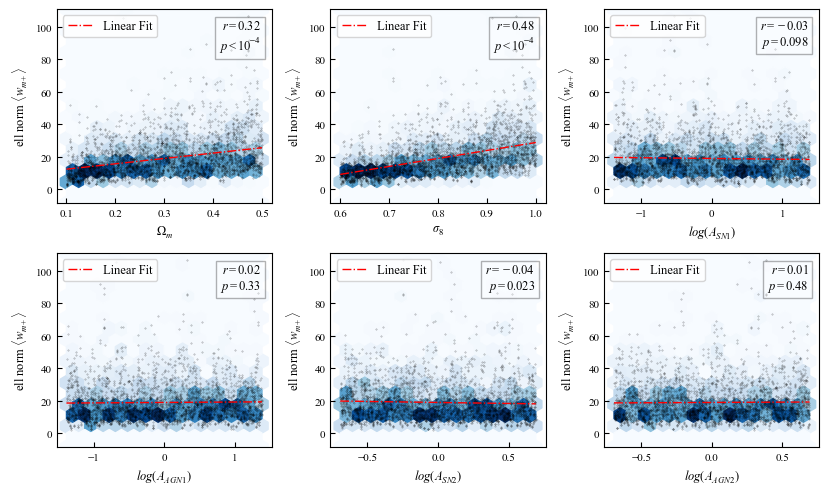

In [237]:
corr_data = wdd[:,:]
weights = 1#/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
# fig.suptitle('magnitude Normalised Ellipticities',fontsize=15)
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
#     ax.axhline(np.mean(wtd_corr_data), c='0.5', linewidth=0.2, linestyle='-',label='')
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], np.min(wtd_corr_data),0.2*np.max(wtd_corr_data)),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.1, color='black',alpha=0.4,label="")
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"ell norm $\langle w_{m+} \rangle$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([np.min(wtd_corr_data),0.2*np.max(wtd_corr_data)])
plt.tight_layout()

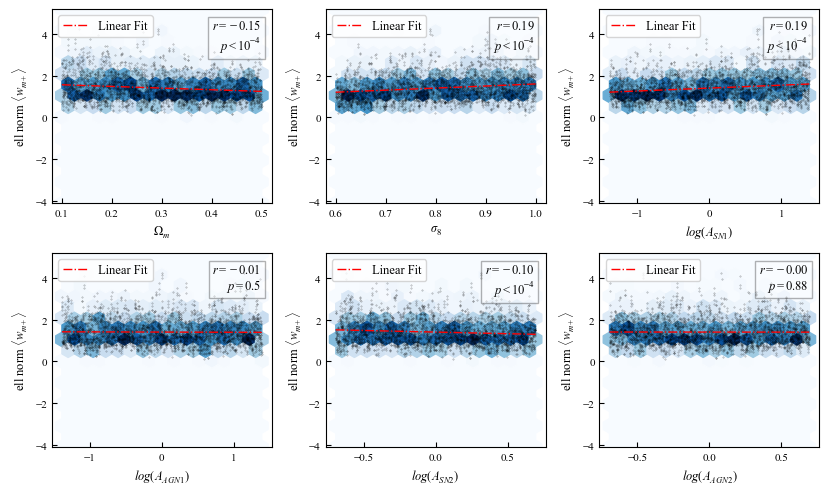

In [227]:
corr_data = wdg_spi[:,:]
weights = 1/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
# fig.suptitle('magnitude Normalised Ellipticities',fontsize=15)
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
#     ax.axhline(np.mean(wtd_corr_data), c='0.5', linewidth=0.2, linestyle='-',label='')
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], np.min(wtd_corr_data),0.5*np.max(wtd_corr_data)),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.1, color='black',alpha=0.4,label="")
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"ell norm $\langle w_{m+} \rangle$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([ np.min(wtd_corr_data),0.5*np.max(wtd_corr_data)])
plt.tight_layout()

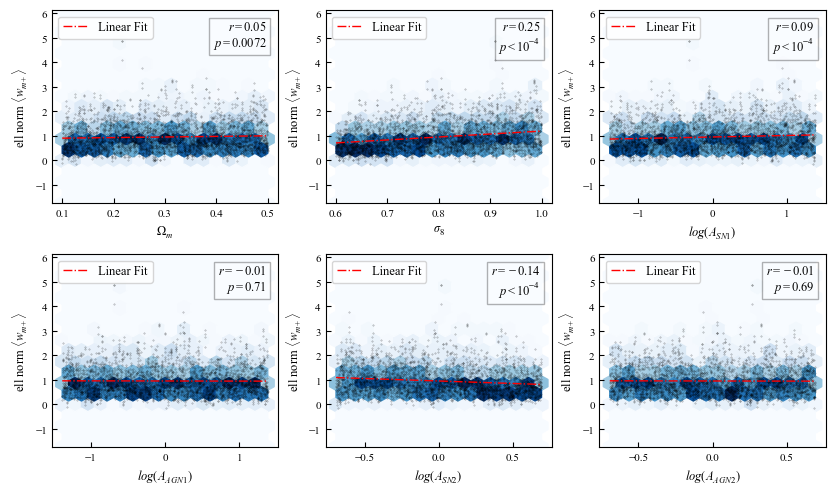

In [145]:
corr_data = wdg_ell[:,:]#/wdg_ell[:,:4]
weights = 1/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
# fig.suptitle('magnitude Normalised Ellipticities',fontsize=15)
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
#     ax.axhline(np.mean(wtd_corr_data), c='0.5', linewidth=0.2, linestyle='-',label='')
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], 0.5*np.min(wtd_corr_data),0.5*np.max(wtd_corr_data)),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.1, color='black',alpha=0.4,label="")
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"ell norm $\langle w_{m+} \rangle$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([0.5*np.min(wtd_corr_data),0.5*np.max(wtd_corr_data)])
plt.tight_layout()

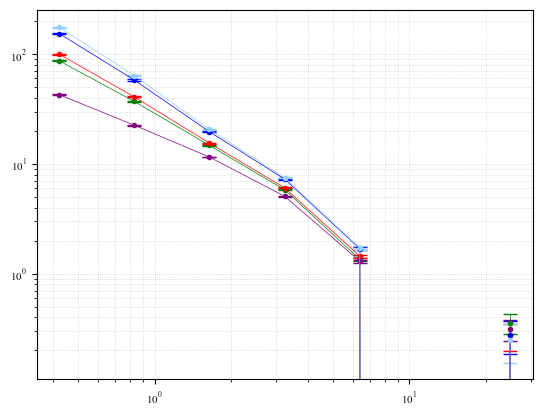

In [197]:
plt.errorbar(r,np.mean(wgd,axis=0), yerr=np.std(wgd,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5, c='green',label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
plt.errorbar(r,np.mean(wdg_noORI,axis=0), yerr=np.std(wdg_noORI,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5, c='red',label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
plt.errorbar(r,np.mean(wdg_spi,axis=0), yerr=np.std(wdg_spi,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5, c='purple',label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
plt.errorbar(r,np.mean(wdg_ell,axis=0), yerr=np.std(wdg_ell,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5, c='blue',label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
plt.errorbar(r,np.mean(wdg_noORI_ell,axis=0), yerr=np.std(wdg_noORI_ell,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5, c='xkcd:light blue',label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
plt.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) 
plt.xscale('symlog'); plt.yscale('symlog')

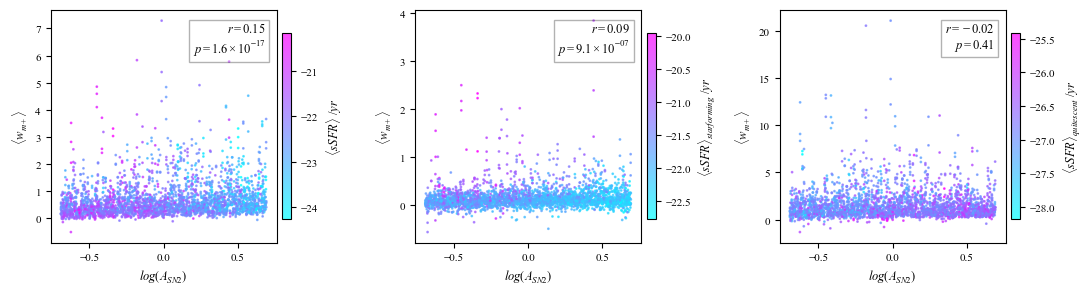

In [348]:
param=0
def plotCB(param,y1,y2,y3,c1,c2,c3,y1label=f'SSFR /yr',y2label=f'SSFR /yr',y3label=f'SSFR /yr',
           c1label=r'$log(\langle\epsilon\rangle)$', c2label=r'$log(\langle\epsilon\rangle)$', c3label=r'$log(\langle\epsilon\rangle)$'):
    global cbar2, cbar3
    fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(33/3,3))
    scatter = ax[0].scatter(corr_labels[:,param], y1, s=1, c=c1, cmap=mpl.cm.cool,alpha=0.7,label="")
    ax[0].set_xlabel(f'${simpars[param]}$')
    ax[0].set_ylabel(y1label)
    cbar = fig.colorbar(scatter, ax=ax[0], orientation='vertical', shrink=0.8, pad=0.02)
    cbar.set_label(c1label, fontsize=9)
    pearson_coeff, p_value = pearsonr(corr_labels[:,param], y1)
    if p_value:
        ax[0].text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax[0].transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    scatter = ax[1].scatter(corr_labels[:,param], y2, s=1, c=c2, cmap=mpl.cm.cool,alpha=0.7,label="")
    ax[1].set_xlabel(f'${simpars[param]}$')
    ax[1].set_ylabel(y2label)
    cbar2 = fig.colorbar(scatter, ax=ax[1], orientation='vertical', shrink=0.8, pad=0.02)
    cbar2.set_label(c2label, fontsize=9)
    pearson_coeff, p_value = pearsonr(corr_labels[:,param], y2)
    if p_value:
        ax[1].text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax[1].transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    scatter = ax[2].scatter(corr_labels[:,param], y3, s=1, c=c3, cmap=mpl.cm.cool,alpha=0.7,label="")
    ax[2].set_xlabel(f'${simpars[param]}$')
    ax[2].set_ylabel(y3label)
    cbar3 = fig.colorbar(scatter, ax=ax[2], orientation='vertical', shrink=0.8, pad=0.02)
    cbar3.set_label(c3label, fontsize=9)
    pearson_coeff, p_value = pearsonr(corr_labels[:,param], y3)
    if p_value:
        ax[2].text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax[2].transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    plt.tight_layout()
#     ax[0].set_yscale('log'); ax[1].set_yscale('log'); ax[2].set_yscale('log')
    
plotCB(4, np.mean(wdp, axis=1), np.mean(wdp_spi, axis=1), np.mean(wdp_ell, axis=1), np.log(mean_SSFR), np.log(mean_SSFR_spi), np.log(mean_SSFR_ell), 
       y1label=r'$\langle w_{m+} \rangle$', c1label=r'$ \langle sSFR \rangle$ $/yr$', 
       y2label=r'$\langle w_{m+} \rangle$', c2label=r'$ \langle sSFR \rangle_{{star forming}}$ $/yr$',
       y3label=r'$\langle w_{m+} \rangle$', c3label=r'$ \langle sSFR \rangle_{{quitescent}}$ $/yr$')

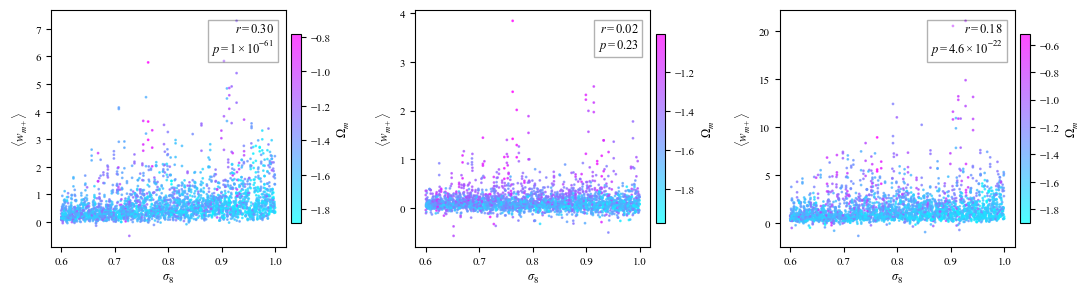

In [151]:
plotCB(1, np.mean(wdp, axis=1), np.mean(wdp_spi, axis=1), np.mean(wdp_ell, axis=1), np.log(mean_e), np.log(mean_e_spi), np.log(mean_e_ell), 
       y1label=r'$\langle w_{m+} \rangle$', c1label=r'$\Omega_m$', 
       y2label=r'$\langle w_{m+} \rangle$', c2label=r'$\Omega_m$',
       y3label=r'$\langle w_{m+} \rangle$', c3label=r'$ \Omega_m$')

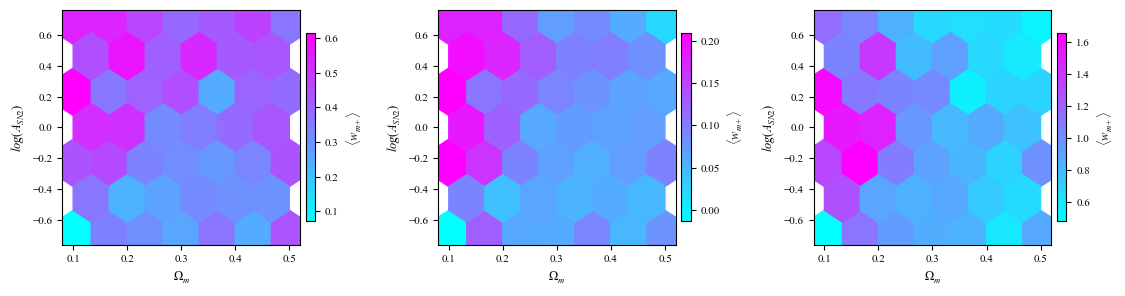

In [347]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(34/3,3))
hb = ax[0].hexbin(
    corr_labels[:, 0], corr_labels[:, 4], 
    C=np.mean(wdp_noMAG[:,:],axis=1), 
    gridsize=6,  # Adjust the resolution of the bins
    cmap=mpl.cm.cool, 
    reduce_C_function=np.mean,
)
ax[0].set_xlabel(f'${simpars[0]}$')
ax[0].set_ylabel(f'${simpars[4]}$')
cbar = fig.colorbar(hb, ax=ax[0], orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label(r'$ \langle w_{m+} \rangle$ ', fontsize=9)

hb = ax[1].hexbin(
    corr_labels[:,0], corr_labels[:,4], 
    C=np.mean(wdp_noMAG_spi[:,:],axis=1), 
    gridsize=6,  # Adjust the resolution of the bins
    cmap=mpl.cm.cool, 
    reduce_C_function=np.mean  
)
ax[1].set_xlabel(f'${simpars[0]}$')
ax[1].set_ylabel(f'${simpars[4]}$')
cbar = fig.colorbar(hb, ax=ax[1], orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label(r'$ \langle w_{m+} \rangle$', fontsize=9)

hb = ax[2].hexbin(
    corr_labels[:,0], corr_labels[:,4], 
    C=np.mean(wdp_noMAG_ell[:,:],axis=1), 
    gridsize=6,  # Adjust the resolution of the bins
    cmap=mpl.cm.cool, 
    reduce_C_function=np.mean  
)
ax[2].set_xlabel(f'${simpars[0]}$')
ax[2].set_ylabel(f'${simpars[4]}$')
cbar = fig.colorbar(hb, ax=ax[2], orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label(r'$ \langle w_{m+} \rangle$ ', fontsize=9)

fig.tight_layout()

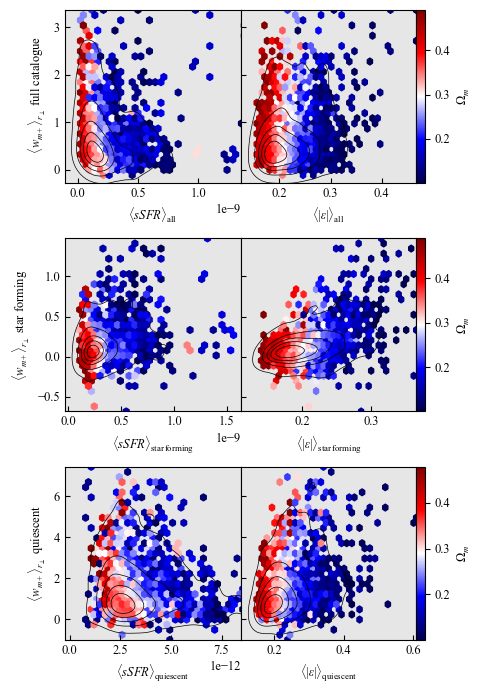

In [20]:
def prob_contour(row_list, col_list, colour, c_label):
    row_labels = [r' $\langle w_{m+} \rangle_{r_\perp}$ full catalogue', r"$\langle w_{m+} \rangle_{r_\perp}$ star forming", r"$\langle w_{m+} \rangle_{r_\perp}$ quiescent"]

    fig = plt.figure(figsize=(12 / 3, 14))  # Set the figure size
    gs = fig.add_gridspec(3, 3, width_ratios=[1, 1, 0.05], wspace=0, hspace=0.32)  # Create a gridspec without spacing

    for i, col_data in enumerate(col_list):
        row_idx = i // 2  
        col_idx = i % 2   
        ax = fig.add_subplot(gs[row_idx, col_idx])
        row_data = row_list[row_idx]
        avg_corr = np.mean(row_data, axis=1)
        ax.set_facecolor('.9')
    #     hb = ax.scatter(col_data, avg_corr, s=10, c=corr_labels[:,2], cmap=mpl.cm.inferno,alpha=.1,label="")
    #     cbar = fig.colorbar(hb, ax=ax, orientation='vertical', shrink=0.8, pad=0.02)
    #     cbar.set_label(f"${simpars[2]}$", fontsize=9)
        if row_idx == 0:
            hb = ax.hexbin(
                col_data, avg_corr, C=colour, 
                gridsize=31,  # Adjust the resolution of the bins
                cmap=mpl.cm.seismic, #inferno
                reduce_C_function=np.mean,
                extent=(min(col_data), max(col_data), min(avg_corr)+.15, 0.5*max(avg_corr))
                )
        else:
            hb = ax.hexbin(
                col_data, avg_corr, C=colour, 
                gridsize=31,  # Adjust the resolution of the bins
                cmap=mpl.cm.seismic, #inferno
                reduce_C_function=np.mean,
                extent=(min(col_data), max(col_data), min(avg_corr), 0.4*max(avg_corr))
                )

    #     sns.kdeplot(x=col_data, y=avg_corr,
    #         fill=True, levels=6, cmap='Blues', alpha=1, ax=ax)
        sns.kdeplot(x=col_data, y=avg_corr,
            weights=1, fill=False, levels=6, colors='k', linewidths=.5, ax=ax)

    #     median_x = np.median(col_data)
    #     median_y = np.median(avg_corr)
    #     ax.scatter(median_x, median_y, color='xkcd:very light blue', marker='+', s=10, label="Median")

        ax.set_ylim([min(avg_corr), 0.4 * max(avg_corr)])
        if row_idx==0:
            ax.set_ylim([min(avg_corr)+.2, 0.5 * max(avg_corr)])
        ax.tick_params(direction='in')#, length=6, width=1)


        if col_idx == 0:  # Left column
            ax.set_ylabel(f"{row_labels[row_idx]}")
            ax.set_xlim(None, 0.9 * max(col_data))
        else:
            ax.set_yticklabels([])
            ax.set_xlim(None, max(col_data))
#             cbar = fig.colorbar(hb, ax=ax, orientation='vertical', shrink=0.8, pad=0.02)
#             cbar.set_label(c_label, fontsize=9)
            c_ax = fig.add_subplot(gs[row_idx, 2])  # Create a separate axis for the colorbar
            cbar = plt.colorbar(hb, cax=c_ax, orientation='vertical')
            cbar.set_label(c_label)
        if col_idx ==0:
            if row_idx==0:
                ax.set_xlabel(r'$\langle sSFR \rangle_\mathrm{all}$')
            if row_idx==1:
                ax.set_xlabel(r'$\langle sSFR \rangle_\mathrm{star\,forming}$')
            if row_idx==2:
                ax.set_xlabel(r'$\langle sSFR \rangle_\mathrm{quiescent}$')
        else:
            if row_idx==0:
                ax.set_xlabel(r'$\langle |\epsilon|\rangle_\mathrm{all}$')
            if row_idx==1:
                ax.set_xlabel(r'$\langle |\epsilon|\rangle_\mathrm{star\,forming}$')
            if row_idx==2:
                ax.set_xlabel(r'$\langle |\epsilon|\rangle_\mathrm{quiescent}$')
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.5)
            
row_list = [wdp, wdp_spi, wdp_ell]
col_list = [mean_SSFR, mean_e, mean_SSFR_spi, mean_e_spi, mean_SSFR_ell, mean_e_ell]
prob_contour(row_list, col_list, colour=corr_labels[:,0], c_label=f"${simpars[0]}$")

# plt.savefig(
#     '/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/corrvs ssfr e.pdf',
#     dpi=300, bbox_inches='tight'
# )


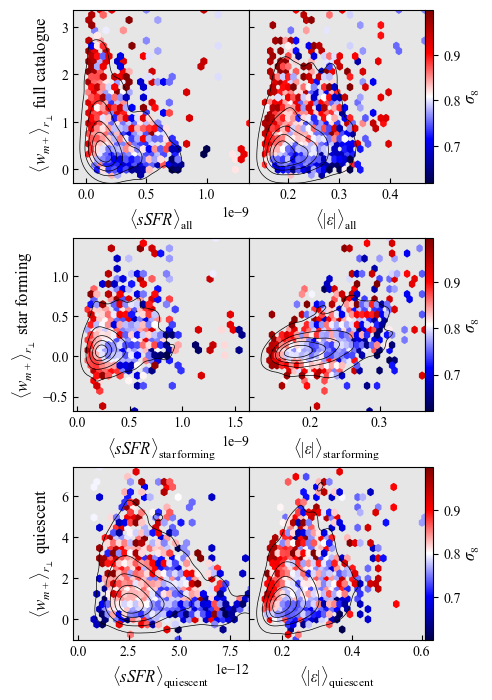

In [476]:
row_list = [wdp, wdp_spi, wdp_ell]
# row_list = [wdp_noMAG, wdp_noMAG_spi, wdp_noMAG_ell]
col_list = [mean_SSFR, mean_e, mean_SSFR_spi, mean_e_spi, mean_SSFR_ell, mean_e_ell]
prob_contour(row_list, col_list, colour=corr_labels[:,1], c_label=f"${simpars[1]}$")
plt.savefig(
    '/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/corrs ssfr e sig8.pdf',
    dpi=300, bbox_inches='tight'
)

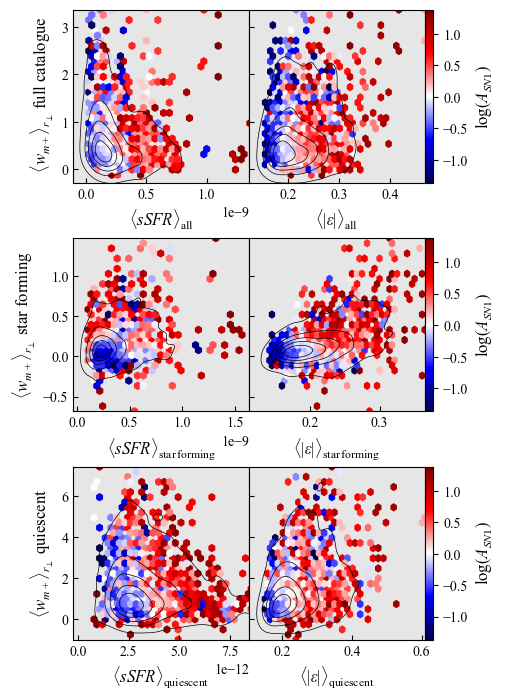

In [478]:
row_list = [wdp, wdp_spi, wdp_ell]
# row_list = [wdp_noMAG, wdp_noMAG_spi, wdp_noMAG_ell]
col_list = [mean_SSFR, mean_e, mean_SSFR_spi, mean_e_spi, mean_SSFR_ell, mean_e_ell]
prob_contour(row_list, col_list, colour=corr_labels[:,2], c_label=f"${simpars[2]}$")
plt.savefig(
    '/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/corrs ssfr e A_SN1.pdf',
    dpi=300, bbox_inches='tight'
)

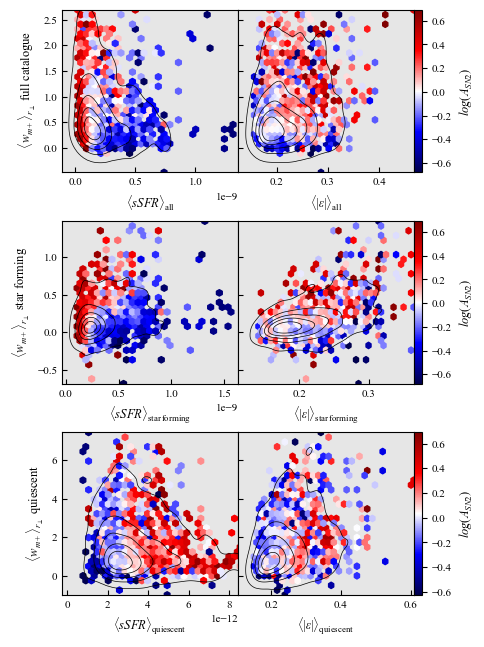

In [57]:
row_list = [wdp, wdp_spi, wdp_ell]
# row_list = [wdp_noMAG, wdp_noMAG_spi, wdp_noMAG_ell]
col_list = [mean_SSFR, mean_e, mean_SSFR_spi, mean_e_spi, mean_SSFR_ell, mean_e_ell]
prob_contour(row_list, col_list, colour=corr_labels[:,4], c_label=f"${simpars[4]}$")

In [344]:
row_list = [wdp, wdp_spi, wdp_ell]
col_list = [mean_SSFR, 1/split_fracs, mean_SSFR_spi, 1/split_fracs, mean_SSFR_ell, 1/split_fracs]
prob_contour(row_list, col_list, colour=corr_labels[:,1], c_label=f"${simpars[1]}$")

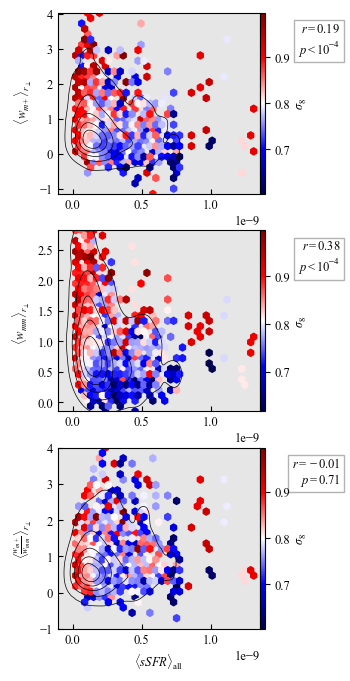

In [21]:
def divNweigh(one, two):
    corr_data = one/two
    weights = 1/np.std(corr_data,axis=0)
    wtd_corr_data = corr_data*weights
    return wtd_corr_data

def prob_contour2(x_list, col_list, colour, c_label):
    col_labels = [r' $\langle w_{m+} \rangle_{r_\perp}$', r"$\langle w_{mm} \rangle_{r_\perp}$ ", r"$ \langle \frac{w_{m+}}{ w_{mm}} \rangle_{r_\perp}$"]

    fig = plt.figure(figsize=(8 / 3, 8))  # Set the figure size
    gs = fig.add_gridspec(3, 2, width_ratios=[1, 0.025],height_ratios=[1, 1, 1], wspace=0, hspace=.2)  # Create a gridspec without spacing

    for i, col_data in enumerate(col_list):
        ax = fig.add_subplot(gs[i,0])
        x_dat = x_list[i]
        avg_corr = np.mean(col_data, axis=1)
        ax.set_facecolor('.9')
        if i<2:
            hb = ax.hexbin(
                x_dat, avg_corr, C=colour, 
                gridsize=31,  # Adjust the resolution of the bins
                cmap=mpl.cm.seismic, #inferno
                reduce_C_function=np.mean,
                extent=(min(x_dat), 0.9 *max(x_dat), min(avg_corr), 0.6* max(avg_corr))
                )
        else:
            hb = ax.hexbin(
                x_dat, avg_corr, C=colour, 
                gridsize=31,  # Adjust the resolution of the bins
                cmap=mpl.cm.seismic, #inferno
                reduce_C_function=np.mean,
                extent=(min(x_dat), 0.9 *max(x_dat), -1, 4)
                )
            


        sns.kdeplot(x=x_dat, y=avg_corr,
            weights=1, fill=False, levels=6, colors='k', linewidths=.5, ax=ax)

        c_ax = fig.add_subplot(gs[i, 1])  # Create a separate axis for the colorbar
        cbar = plt.colorbar(hb, cax=c_ax, orientation='vertical')
        cbar.set_label(c_label, fontsize=9)
        
        ax.set_ylabel(f"{col_labels[i]}", fontsize=9)
        ax.set_ylim([min(avg_corr), 0.6 * max(avg_corr)])
        ax.set_xlim(None, 0.9 * max(x_dat))
        ax.tick_params(direction='in')#, length=6, width=1)

        if i == 2:  # Left column
            ax.set_xlabel(r'$\langle sSFR \rangle_\mathrm{all}$')
            ax.set_ylim(-1, 4)
        
        pearson_coeff, p_value = pearsonr(avg_corr, colour)
        if p_value>1e-4:
            ax.text( 1.4, 0.95, 
            f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
            transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
        else:
            ax.text(1.4, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
            fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
            

#     plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.5)
            
row_list = [divNweigh(wdp[:,:],1), divNweigh(wdd[:,:],1), divNweigh(wdp[:,:4],wdd[:,:4])]
x_list = [mean_SSFR, mean_SSFR, mean_SSFR]
prob_contour2(x_list, row_list, colour=corr_labels[:,1], c_label=f"${simpars[1]}$")


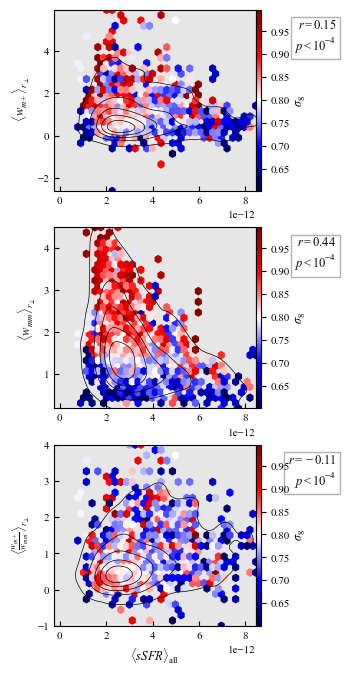

In [197]:
row_list = [divNweigh(wdp_ell[:,:4],1), divNweigh(wdd[:,:4],1), divNweigh(wdp_ell[:,:4],wdd[:,:4])]
x_list = [mean_SSFR_ell, mean_SSFR_ell, mean_SSFR_ell]
prob_contour2(x_list, row_list, colour=corr_labels[:,1], c_label=f"${simpars[1]}$")

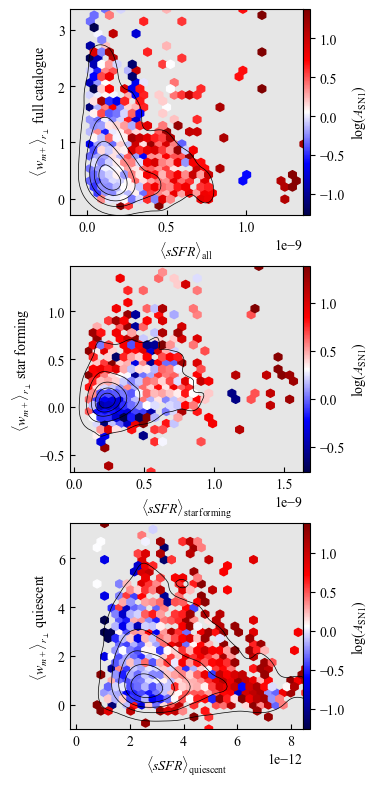

In [65]:
def prob_contour3(x_list, col_list, colour, c_label):
    col_labels =[r' $\langle w_{m+} \rangle_{r_\perp}$ full catalogue', r"$\langle w_{m+} \rangle_{r_\perp}$ star forming", r"$\langle w_{m+} \rangle_{r_\perp}$ quiescent"]

    fig = plt.figure(figsize=(8/3, 8))  # Set the figure size
    gs = fig.add_gridspec(3, 2, width_ratios=[1, 0.03],height_ratios=[1, 1, 1], wspace=0, hspace=.25)  # Create a gridspec without spacing

    for i, col_data in enumerate(col_list):
        ax = fig.add_subplot(gs[i,0])
        x_dat = x_list[i]
        avg_corr = np.mean(col_data, axis=1)
        ax.set_facecolor('.9')

        if i == 0:
            hb = ax.hexbin(
                x_dat, avg_corr, C=colour, 
                gridsize=31,  # Adjust the resolution of the bins
                cmap=mpl.cm.seismic, #inferno
                reduce_C_function=np.mean,
                extent=(min(x_dat), max(x_dat), min(avg_corr)+.15, 0.5*max(avg_corr))
                )
        else:
            hb = ax.hexbin(
                x_dat, avg_corr, C=colour, 
                gridsize=31,  # Adjust the resolution of the bins
                cmap=mpl.cm.seismic, #inferno
                reduce_C_function=np.mean,
                extent=(min(x_dat), max(x_dat), min(avg_corr), 0.4*max(avg_corr))
                )

            


        sns.kdeplot(x=x_dat, y=avg_corr,
            weights=1, fill=False, levels=6, colors='k', linewidths=.5, ax=ax)

        c_ax = fig.add_subplot(gs[i, 1])  # Create a separate axis for the colorbar
        cbar = plt.colorbar(hb, cax=c_ax, orientation='vertical')
        cbar.set_label(c_label, fontsize=10)
        
        ax.set_ylabel(f"{col_labels[i]}", fontsize=10)
        ax.set_ylim([min(avg_corr), 0.4 * max(avg_corr)])
        ax.set_xlim(None, 0.9 * max(x_dat))
        ax.tick_params(direction='in')#, length=6, width=1)
        

        
        if i==0:
            ax.set_xlabel(r'$\langle sSFR \rangle_\mathrm{all}$')
            ax.set_ylim([min(avg_corr)+.2, 0.5 * max(avg_corr)])
        if i==1:
            ax.set_xlabel(r'$\langle sSFR \rangle_\mathrm{star\,forming}$')
        if i==2:
            ax.set_xlabel(r'$\langle sSFR \rangle_\mathrm{quiescent}$',fontsize=10)
            
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
         


            
row_list = [wdp[:,:], wdp_spi[:,:], wdp_ell[:,:]]
x_list = [mean_SSFR, mean_SSFR_spi, mean_SSFR_ell]
prob_contour3(x_list, row_list, colour=corr_labels[:,2], c_label=f"${simpars[2]}$")
plt.savefig(
    '/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/corrs ssfr e ASN1 2.pdf',
    dpi=300, bbox_inches='tight'
)